# [BRAIN] Titans + MIRAS: Building AI with Long-Term Memory
## A BEGINNER'S GUIDE TO NEXT-GEN AI ARCHITECTURE

Welcome, student! 🎓

---

## 🤔 What Will You Learn Today?

Today, we are going to embark on an exciting journey into the cutting edge of Artificial Intelligence. We will learn about **Titans** and **MIRAS**, two revolutionary concepts from Google Research that help AI "remember" things for a very long time.

### 🧩 The Problem We're Solving

Imagine you're reading a long novel. You can easily remember:
- What happened in the **last few pages** (Short-Term Memory)
- Important plot points from **earlier chapters** (Long-Term Memory)

Current AI models (like standard Transformers) are like readers who can only remember the last few pages! **Titans** solves this by giving AI both types of memory.

### 🎯 What We'll Build

| Step | What We Do | Why It Matters |
|------|------------|----------------|
| 1️⃣ **Setup** | Check our hardware | Ensure GPU is ready |
| 2️⃣ **Data** | Download Shakespeare | AI needs text to learn from |
| 3️⃣ **Tokenization** | Convert text -> numbers | Computers only understand numbers |
| 4️⃣ **Architecture** | Build Titans model | The "brain" structure |
| 5️⃣ **Training** | Teach the model | Learning from examples |
| 6️⃣ **Chat** | Talk to our AI | See it in action! |

---

## 📖 Quick Concepts (Read This First!)

### What is a Neural Network?
Think of it as a **function** that takes input and produces output. Just like `f(x) = 2x + 1`, but with millions of learnable parameters instead of just `2` and `1`.

### What is a Transformer?
A type of neural network that processes text by looking at **relationships between words**. ChatGPT, Claude, and most modern AI use Transformers.

### What is Memory in AI?
- **Short-Term Memory (Attention)**: "I remember the last 100 words"
- **Long-Term Memory (Neural Memory)**: "I remember important patterns from the entire conversation"

### What is MIRAS?
A training strategy that says: **"Focus more on surprising/difficult examples"**. Like a student spending more time on hard problems!

---

Let's begin! 🚀

## Google Colab Setup

**Running on Colab?** Execute the cell below to install dependencies and configure the environment.

**Running locally?** Skip this cell (dependencies should be installed via `pip install -r requirements.txt`).

In [26]:
# ============================================================================
# GOOGLE COLAB SETUP (Skip if running locally)
# ============================================================================
# This cell installs all required dependencies for Google Colab
# If you're running locally, you can skip this cell.

import sys

# Check if we're running in Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("[COLAB] Detected Google Colab environment")
    print("[COLAB] Installing required packages...")
    
    # Install core dependencies
    !pip install -q torch torchvision torchaudio
    !pip install -q matplotlib requests tqdm
    
    # Configure matplotlib for Colab
    import matplotlib
    matplotlib.rcParams['font.family'] = 'DejaVu Sans'
    
    # Check GPU availability
    import torch
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
        print(f"[COLAB] GPU detected: {gpu_name} ({gpu_memory:.1f} GB)")
    else:
        print("[COLAB] No GPU detected. Training will be slower on CPU.")
        print("[COLAB] Tip: Go to Runtime -> Change runtime type -> GPU")
    
    print("[COLAB] Setup complete!")
else:
    print("[LOCAL] Not running in Colab. Skipping setup.")
    print("[LOCAL] Make sure you've run: pip install -r requirements.txt")

[LOCAL] Not running in Colab. Skipping setup.
[LOCAL] Make sure you've run: pip install -r requirements.txt


# 📋 Table of Contents

| Part | Topic | Description |
|------|-------|-------------|
| **Part 1** | 🖥️ Environment Setup | Check hardware, import libraries, GPU benchmark |
| **Part 2** | [INFO] Data Pipeline | Download data, visualize, tokenize, create batches |
| **Part 3** | [BRAIN] Titans Architecture | Embeddings, Attention, Neural Memory, Gating, Full Model |
| **Part 4** | 🎓 Training with MIRAS | Hyperparameters, training loop, loss curves |
| **Part 5** | [CHART] Analysis | Training visualization, model evolution, learned patterns |
| **Part 6** | [CHAT] Inference | Text generation, temperature, interactive chat |

**⏱️ Estimated Time:** 30-45 minutes to run all cells

---

---

# 🖥️ Part 1: Environment Setup

## Why Do We Need a GPU?

Training AI is like doing millions of math problems simultaneously. 

| Hardware | Analogy | Speed |
|----------|---------|-------|
| **CPU** | One very smart person | 1x |
| **GPU** | Thousands of workers in parallel | 100x+ |

We'll check if your GPU is ready!

In [27]:
# ============================================================
# STEP 1.1: Import Libraries
# ============================================================
# These are our "tools" - pre-written code packages that help us

import torch                        # The main AI framework (like TensorFlow, but easier)
import torch.nn as nn               # Neural Network building blocks
import torch.nn.functional as F     # Useful functions (softmax, relu, etc.)
import requests                     # For downloading files from the internet
import os                           # For file/folder operations
import matplotlib.pyplot as plt     # For creating visualizations
import numpy as np                  # For numerical operations
import platform                     # To check our computer's specs
import time                         # For timing operations
from tqdm import tqdm               # Progress bars (makes waiting fun!)
import warnings

# Suppress some technical warnings that might confuse beginners
warnings.filterwarnings("ignore", message=".*cuda capability.*", category=UserWarning)

# Configure matplotlib to handle Unicode characters properly
# This prevents "missing glyph" warnings for special characters
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("[OK] All libraries imported successfully!")
print("\n[INFO] Libraries we're using:")
print(f"   - PyTorch version: {torch.__version__}")
print(f"   - NumPy version: {np.__version__}")

[OK] All libraries imported successfully!

[INFO] Libraries we're using:
   - PyTorch version: 2.10.0+cu130
   - NumPy version: 2.2.6


### 🔍 Hardware Detection

Now let's check what hardware we have available. The code below will:
1. Check your CPU type
2. Look for a GPU (Graphics Processing Unit)
3. Set up the best settings for your machine

In [28]:
# ============================================================
# STEP 1.2: Check Hardware (CPU & GPU)
# ============================================================

print("🔍 Checking Hardware Environment...\n")

# Check CPU Architecture
cpu_arch = platform.machine()
print(f"🖥️  CPU Architecture: {cpu_arch}")

# Check for GPU
if torch.cuda.is_available():
    print(f"[OK] GPU Available: Yes!")
    print(f"   • CUDA Version: {torch.version.cuda}")
    print(f"   • GPU Count: {torch.cuda.device_count()}")
    print(f"   • GPU Model: {torch.cuda.get_device_name(0)}")
    
    # Get GPU memory info
    total_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"   • GPU Memory: {total_memory:.1f} GB")
    
    device = torch.device("cuda")
    dtype = torch.bfloat16  # Best for modern GPUs
    print(f"\n🚀 Using GPU with BFloat16 precision for fast training!")
else:
    print("[!]  No GPU detected. Using CPU (this will be slower).")
    device = torch.device("cpu")
    dtype = torch.float32

# Create folder for saving our work
os.makedirs("artifacts", exist_ok=True)
print("\n📂 Created 'artifacts' folder for saving checkpoints.")

🔍 Checking Hardware Environment...

🖥️  CPU Architecture: aarch64
[OK] GPU Available: Yes!
   • CUDA Version: 13.0
   • GPU Count: 1
   • GPU Model: NVIDIA GB10
   • GPU Memory: 128.5 GB

🚀 Using GPU with BFloat16 precision for fast training!

📂 Created 'artifacts' folder for saving checkpoints.


### [CHART] Visualizing CPU vs GPU Speed

Let's see why GPUs are so much faster for AI work:

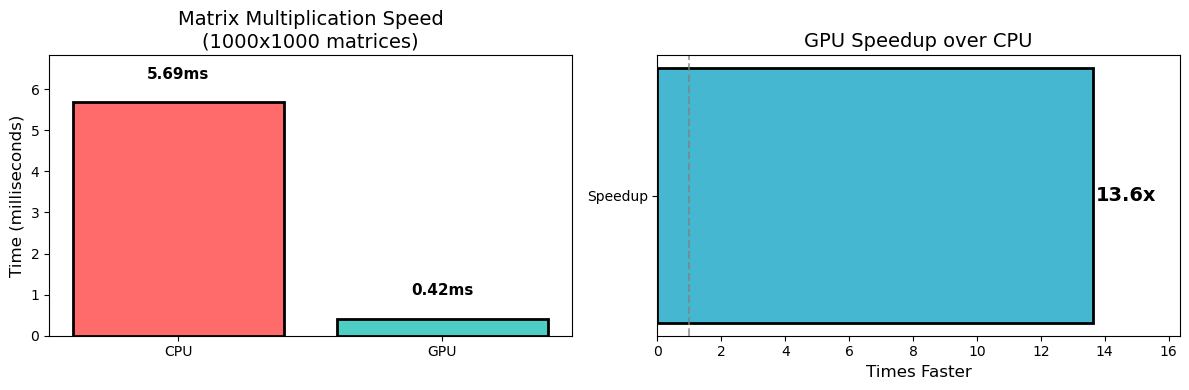


[TIP] Key Insight: GPU is 13.6x faster for matrix operations!
   This is why we use GPUs for training neural networks.


In [29]:
# ============================================================
# STEP 1.3: Visualize CPU vs GPU (Quick Benchmark)
# ============================================================

# Let's do a simple matrix multiplication benchmark
matrix_size = 1000

# Time on CPU
cpu_matrix = torch.randn(matrix_size, matrix_size)
start = time.time()
_ = cpu_matrix @ cpu_matrix  # Matrix multiplication
cpu_time = time.time() - start

# Time on GPU (if available)
if torch.cuda.is_available():
    gpu_matrix = torch.randn(matrix_size, matrix_size, device='cuda')
    torch.cuda.synchronize()  # Wait for GPU to be ready
    start = time.time()
    _ = gpu_matrix @ gpu_matrix
    torch.cuda.synchronize()  # Wait for operation to complete
    gpu_time = time.time() - start
else:
    gpu_time = cpu_time  # If no GPU, same as CPU

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart comparing times
ax1 = axes[0]
bars = ax1.bar(['CPU', 'GPU'], [cpu_time * 1000, gpu_time * 1000], 
               color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=2)
ax1.set_ylabel('Time (milliseconds)', fontsize=12)
ax1.set_title(f'Matrix Multiplication Speed\n({matrix_size}x{matrix_size} matrices)', fontsize=14)
ax1.set_ylim(0, max(cpu_time, gpu_time) * 1000 * 1.2)

# Add value labels on bars
for bar, val in zip(bars, [cpu_time * 1000, gpu_time * 1000]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.2f}ms', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Speedup visualization
ax2 = axes[1]
speedup = cpu_time / gpu_time if gpu_time > 0 else 1
ax2.barh(['Speedup'], [speedup], color='#45B7D1', edgecolor='black', linewidth=2, height=0.5)
ax2.set_xlabel('Times Faster', fontsize=12)
ax2.set_title('GPU Speedup over CPU', fontsize=14)
ax2.set_xlim(0, max(speedup * 1.2, 2))
ax2.axvline(x=1, color='gray', linestyle='--', alpha=0.7, label='No speedup')
ax2.text(speedup + 0.1, 0, f'{speedup:.1f}x', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('artifacts/cpu_vs_gpu.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[TIP] Key Insight: GPU is {speedup:.1f}x faster for matrix operations!")
print("   This is why we use GPUs for training neural networks.")

---

# [INFO] Part 2: Data Pipeline - From Text to Numbers

## 🤔 Why Do We Need Data?

AI learns by example, just like humans! 
- **Humans**: Learn to speak by hearing thousands of sentences
- **AI**: Learns to write by reading thousands of texts

We'll use **Shakespeare's plays** as our training data. Why Shakespeare?
- [OK] Free and publicly available
- [OK] Complex language patterns
- [OK] Small enough to train quickly (~1MB)

## 🔄 The Data Pipeline

```
Raw Text -> Tokenization -> Numbers -> Tensors -> GPU
"Hello"  ->  ['H','e','l','l','o']  ->  [7,4,11,11,14]  ->  tensor([...])  ->  cuda:0
```

### 📥 Step 2.1: Download the Dataset

In [30]:
# ============================================================
# STEP 2.1: Download Shakespeare Dataset
# ============================================================

# URL where the dataset is hosted
data_url = 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'
file_path = 'artifacts/input.txt'

# Download if not already present
if not os.path.exists(file_path):
    print("⬇️  Downloading Shakespeare dataset...")
    response = requests.get(data_url)
    data = response.text
    
    # Save to file
    with open(file_path, 'w') as f:
        f.write(data)
    print("[OK] Download complete!")
else:
    print("[OK] Dataset found locally. Loading...")
    with open(file_path, 'r') as f:
        data = f.read()

# Show dataset statistics
print(f"\n[CHART] Dataset Statistics:")
print(f"   • Total characters: {len(data):,}")
print(f"   • Total lines: {len(data.splitlines()):,}")
print(f"   • File size: {len(data)/1024:.1f} KB")

# Show a preview
print(f"\n📖 First 300 characters:")
print("=" * 50)
print(data[:300])
print("=" * 50)

⬇️  Downloading Shakespeare dataset...
[OK] Download complete!

[CHART] Dataset Statistics:
   • Total characters: 1,115,394
   • Total lines: 40,000
   • File size: 1089.3 KB

📖 First 300 characters:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


### [CHART] Step 2.2: Visualize the Dataset

Let's explore what's in our data!

[TEXT] Vocabulary Analysis:
   • Unique characters: 65
   • Characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


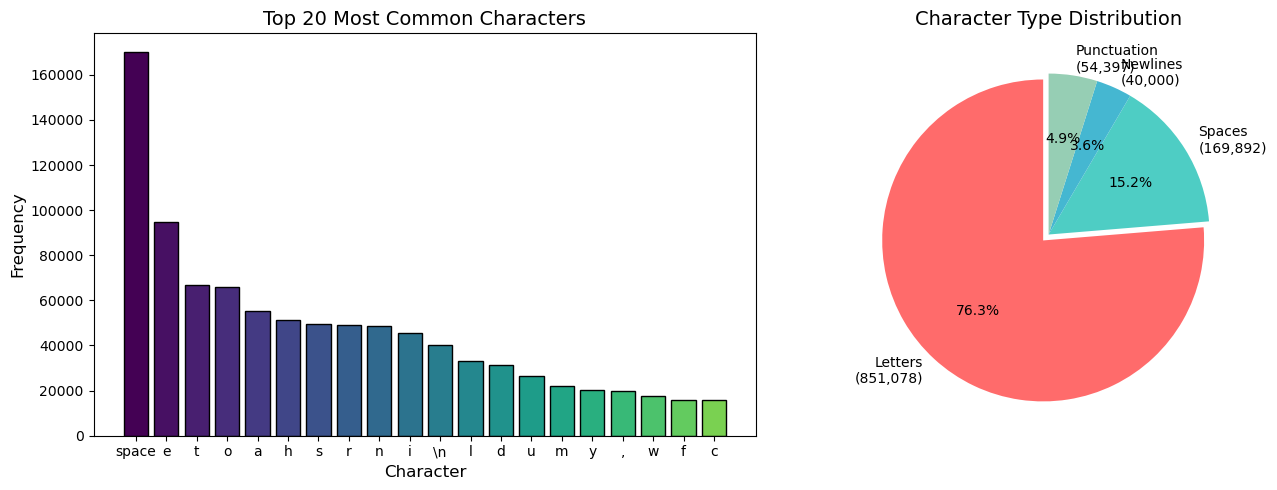


[TIP] Insight: Spaces and letters make up most of the text!
   This is typical for natural language.


In [31]:
# ============================================================
# STEP 2.2: Visualize Character Distribution
# ============================================================

# Find all unique characters
chars = sorted(list(set(data)))
vocab_size = len(chars)

print(f"[TEXT] Vocabulary Analysis:")
print(f"   • Unique characters: {vocab_size}")
print(f"   • Characters: {''.join(chars)}")

# Count character frequencies
from collections import Counter
char_counts = Counter(data)

# Get top 20 most common characters
top_chars = char_counts.most_common(20)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Top 20 characters bar chart
ax1 = axes[0]
chars_labels = [c if c != '\n' else '\\n' for c, _ in top_chars]
chars_labels = [c if c != ' ' else 'space' for c in chars_labels]
counts = [count for _, count in top_chars]

colors = plt.cm.viridis(np.linspace(0, 0.8, len(chars_labels)))
bars = ax1.bar(chars_labels, counts, color=colors, edgecolor='black')
ax1.set_xlabel('Character', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Top 20 Most Common Characters', fontsize=14)
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Character type distribution (pie chart)
ax2 = axes[1]
letters = sum(1 for c in data if c.isalpha())
spaces = data.count(' ')
newlines = data.count('\n')
punctuation = sum(1 for c in data if not c.isalnum() and c not in ' \n')
digits = sum(1 for c in data if c.isdigit())

sizes = [letters, spaces, newlines, punctuation]
labels = [f'Letters\n({letters:,})', f'Spaces\n({spaces:,})', 
          f'Newlines\n({newlines:,})', f'Punctuation\n({punctuation:,})']
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = (0.05, 0, 0, 0)

ax2.pie(sizes, labels=labels, colors=colors_pie, explode=explode,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
ax2.set_title('Character Type Distribution', fontsize=14)

plt.tight_layout()
plt.savefig('artifacts/character_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[TIP] Insight: Spaces and letters make up most of the text!")
print(f"   This is typical for natural language.")

---

### 🔢 Step 2.3: Understanding Tokenization

## What is Tokenization?

Computers can't read letters - they only understand numbers! **Tokenization** converts text into numbers.

```
"Hello" -> ['H', 'e', 'l', 'l', 'o'] -> [7, 4, 11, 11, 14]
```

### Types of Tokenizers:

| Type | What it does | Example | Used by |
|------|-------------|---------|---------|
| **Character-level** | Each letter = 1 token | "Hi" -> [7, 8] | Simple models |
| **Word-level** | Each word = 1 token | "Hello world" -> [42, 99] | Older models |
| **Subword** | Common patterns = 1 token | "playing" -> ["play", "ing"] | GPT, BERT |

We'll use **character-level** tokenization because it's easiest to understand!

In [32]:
# ============================================================
# STEP 2.3: Build Our Tokenizer
# ============================================================

# Create character-to-number mapping (stoi = "string to integer")
stoi = {ch: i for i, ch in enumerate(chars)}

# Create number-to-character mapping (itos = "integer to string")  
itos = {i: ch for i, ch in enumerate(chars)}

# Let's see what our mappings look like
print("📖 Character -> Number Mapping (first 10):")
for i, (char, num) in enumerate(stoi.items()):
    if i >= 10:
        print("   ...")
        break
    display_char = repr(char) if char in '\n\t' else f"'{char}'"
    print(f"   {display_char:8} -> {num}")

# Define our encoder and decoder functions
def encode(text):
    """Convert text to list of numbers"""
    # Skip characters not in our vocabulary (handles edge cases)
    return [stoi[c] for c in text if c in stoi]

def decode(numbers):
    """Convert list of numbers back to text"""
    return ''.join([itos[i] for i in numbers])

# Test our tokenizer!
print("\n🧪 Testing the Tokenizer:")
print("-" * 40)

test_examples = ["Hello", "To be or not to be", "ROMEO:"]
for text in test_examples:
    encoded = encode(text)
    decoded = decode(encoded)
    print(f"Original:  '{text}'")
    print(f"Encoded:   {encoded}")
    print(f"Decoded:   '{decoded}'")
    print(f"Match: {'[OK]' if text == decoded else '❌'}")
    print()

📖 Character -> Number Mapping (first 10):
   '\n'     -> 0
   ' '      -> 1
   '!'      -> 2
   '$'      -> 3
   '&'      -> 4
   '''      -> 5
   ','      -> 6
   '-'      -> 7
   '.'      -> 8
   '3'      -> 9
   ...

🧪 Testing the Tokenizer:
----------------------------------------
Original:  'Hello'
Encoded:   [20, 43, 50, 50, 53]
Decoded:   'Hello'
Match: [OK]

Original:  'To be or not to be'
Encoded:   [32, 53, 1, 40, 43, 1, 53, 56, 1, 52, 53, 58, 1, 58, 53, 1, 40, 43]
Decoded:   'To be or not to be'
Match: [OK]

Original:  'ROMEO:'
Encoded:   [30, 27, 25, 17, 27, 10]
Decoded:   'ROMEO:'
Match: [OK]



### [CHART] Step 2.4: Visualize Tokenization

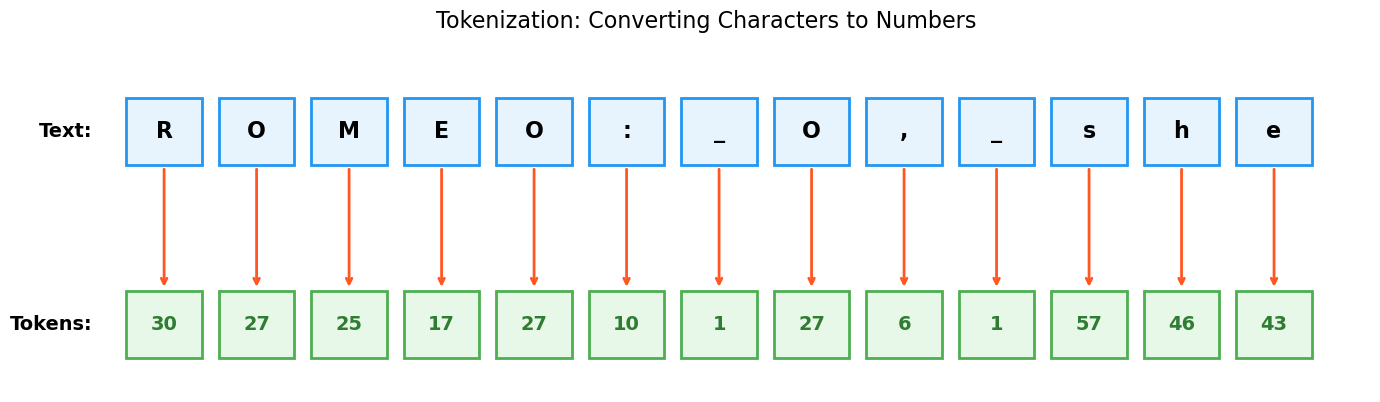


[TIP] Each character becomes a unique number!
   This is how computers 'read' text.


In [33]:
# ============================================================
# STEP 2.4: Visualize Tokenization Process
# ============================================================

# Visualize how tokenization works
example_text = "ROMEO: O, she"
encoded_example = encode(example_text)

fig, ax = plt.subplots(figsize=(14, 5))

# Positions with more vertical space
char_box_y = 1.5      # Character boxes (top row)
token_box_y = -0.8    # Token boxes (bottom row)
box_height = 0.8
box_width = 0.9
spacing = 1.1

# Create a visual representation
for i, (char, token) in enumerate(zip(example_text, encoded_example)):
    x_pos = i * spacing
    
    # Draw character box (top)
    rect = plt.Rectangle((x_pos, char_box_y), box_width, box_height, 
                          facecolor='#E8F4FD', edgecolor='#2196F3', linewidth=2)
    ax.add_patch(rect)
    
    # Draw token box (bottom)
    rect2 = plt.Rectangle((x_pos, token_box_y), box_width, box_height, 
                           facecolor='#E8F8E8', edgecolor='#4CAF50', linewidth=2)
    ax.add_patch(rect2)
    
    # Add character text (centered in char box)
    display_char = char if char != ' ' else '_'
    ax.text(x_pos + box_width/2, char_box_y + box_height/2, display_char, 
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Add token number (centered in token box)
    ax.text(x_pos + box_width/2, token_box_y + box_height/2, str(token), 
            ha='center', va='center', fontsize=14, fontweight='bold', color='#2E7D32')
    
    # Draw arrow from bottom of char box to top of token box
    arrow_x = x_pos + box_width/2
    arrow_start_y = char_box_y  # Bottom of character box
    arrow_end_y = token_box_y + box_height  # Top of token box
    
    ax.annotate('', xy=(arrow_x, arrow_end_y + 0.05), xytext=(arrow_x, arrow_start_y - 0.05),
                arrowprops=dict(arrowstyle='->', color='#FF5722', lw=2, 
                               shrinkA=0, shrinkB=0))

# Add labels
label_x = -0.4
ax.text(label_x, char_box_y + box_height/2, 'Text:', ha='right', va='center', 
        fontsize=14, fontweight='bold')
ax.text(label_x, token_box_y + box_height/2, 'Tokens:', ha='right', va='center', 
        fontsize=14, fontweight='bold')

ax.set_xlim(-1, len(example_text) * spacing + 0.5)
ax.set_ylim(-1.2, 2.8)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Tokenization: Converting Characters to Numbers', fontsize=16, pad=20)

plt.tight_layout()
plt.savefig('artifacts/tokenization_visual.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[TIP] Each character becomes a unique number!")
print(f"   This is how computers 'read' text.")

### [TOOL] Step 2.5: Create Training Data

Now we convert our entire Shakespeare text into tensors (multi-dimensional arrays) that PyTorch can work with.

[CHART] Data Tensor Shape: torch.Size([1115394])
   This means we have 1,115,394 tokens!

[GRAPH] Data Split:
   • Training set:   1,003,854 tokens (90%)
   • Validation set: 111,540 tokens (10%)


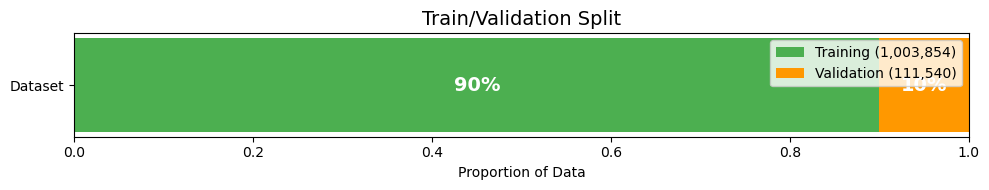


[TIP] Why split the data?
   Training set: Model learns patterns from this
   Validation set: We check if model learned well (unseen data!)


In [34]:
# ============================================================
# STEP 2.5: Convert Data to Tensors
# ============================================================

# Encode the entire dataset
data_tensor = torch.tensor(encode(data), dtype=torch.long)
print(f"[CHART] Data Tensor Shape: {data_tensor.shape}")
print(f"   This means we have {len(data_tensor):,} tokens!")

# Split into training (90%) and validation (10%) sets
# Training: What the model learns from
# Validation: What we test the model on (it never sees this during training!)
split_point = int(0.9 * len(data_tensor))

train_data = data_tensor[:split_point]
val_data = data_tensor[split_point:]

# Move to GPU for speed
train_data = train_data.to(device)
val_data = val_data.to(device)

print(f"\n[GRAPH] Data Split:")
print(f"   • Training set:   {len(train_data):,} tokens (90%)")
print(f"   • Validation set: {len(val_data):,} tokens (10%)")

# Visualize the split
fig, ax = plt.subplots(figsize=(10, 2))

# Create split visualization
total = len(data_tensor)
train_width = split_point / total
val_width = 1 - train_width

ax.barh(['Dataset'], [train_width], color='#4CAF50', label=f'Training ({len(train_data):,})')
ax.barh(['Dataset'], [val_width], left=[train_width], color='#FF9800', 
        label=f'Validation ({len(val_data):,})')

ax.set_xlim(0, 1)
ax.set_xlabel('Proportion of Data')
ax.set_title('Train/Validation Split', fontsize=14)
ax.legend(loc='upper right')

# Add percentage labels
ax.text(train_width/2, 0, '90%', ha='center', va='center', fontsize=14, 
        fontweight='bold', color='white')
ax.text(train_width + val_width/2, 0, '10%', ha='center', va='center', fontsize=14, 
        fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('artifacts/data_split.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[TIP] Why split the data?")
print(f"   Training set: Model learns patterns from this")
print(f"   Validation set: We check if model learned well (unseen data!)")

---

# [BRAIN] Part 3: The Titans Architecture

## Understanding the Big Picture

Think of **Titans** as an AI brain with TWO types of memory:

| Memory Type | Human Analogy | What It Does | Range |
|-------------|---------------|--------------|-------|
| **Short-Term (Attention)** | "I remember what you just said" | Looks at recent tokens | ~128 tokens |
| **Long-Term (Neural Memory)** | "I remember your name from earlier" | Stores patterns in weights | Unlimited! |

## [BUILD] Architecture Overview

```
                    ┌─────────────────────────────────────────┐
                    │           TITANS ARCHITECTURE           │
                    └─────────────────────────────────────────┘
                                        │
                    ┌───────────────────┴───────────────────┐
                    │                                       │
              ┌─────▼──────┐                        ┌───────▼───────┐
              │ ATTENTION  │                        │ NEURAL MEMORY │
              │(Short-Term)│                        │  (Long-Term)  │
              └─────┬──────┘                        └───────┬───────┘
                    │                                       │
                    │     ┌───────────────────┐             │
                    └────►│   GATING LAYER    │◄────────────┘
                          │ (Decides which to │
                          │   trust more)     │
                          └────────┬──────────┘
                                   │
                              ┌────▼────┐
                              │  OUTPUT │
                              └─────────┘
```

Let's build each component step by step!

### 🧱 Step 3.1: Understanding Embeddings

Before we process text, we need to convert token IDs into **vectors** (lists of numbers).

Why? Because:
- Token ID `42` is just a label - it doesn't carry meaning
- A vector like `[0.2, -0.5, 0.8, ...]` can capture relationships between words
- Similar words get similar vectors!

[CHART] Embedding Example:
   Vocabulary size: 65 characters
   Embedding dimension: 128

   Each character gets a 128-dimensional vector!


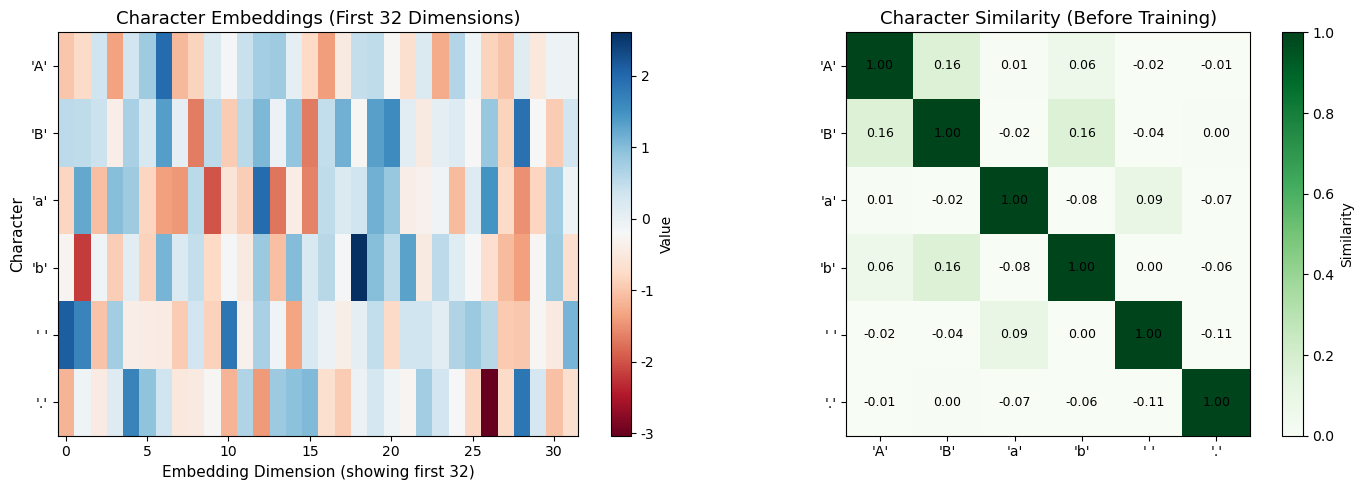


[TIP] Key Insight:
   Before training, similar characters (A/a, B/b) may not have similar embeddings.
   After training, the model learns meaningful relationships!


In [35]:
# ============================================================
# STEP 3.1: Visualize What Embeddings Do
# ============================================================

# Create a simple embedding layer
n_embd = 128  # Each character becomes a 128-dimensional vector
embedding = nn.Embedding(vocab_size, n_embd)

# Get embeddings for some example characters
example_chars = ['A', 'B', 'a', 'b', ' ', '.']
example_ids = [stoi[c] for c in example_chars]
example_embeddings = embedding(torch.tensor(example_ids))

print("[CHART] Embedding Example:")
print(f"   Vocabulary size: {vocab_size} characters")
print(f"   Embedding dimension: {n_embd}")
print(f"\n   Each character gets a {n_embd}-dimensional vector!")

# Visualize embeddings as heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap of embeddings
ax1 = axes[0]
im = ax1.imshow(example_embeddings.detach().numpy()[:, :32], cmap='RdBu', aspect='auto')
ax1.set_yticks(range(len(example_chars)))
ax1.set_yticklabels([repr(c) if c in ' \n' else f"'{c}'" for c in example_chars])
ax1.set_xlabel('Embedding Dimension (showing first 32)', fontsize=11)
ax1.set_ylabel('Character', fontsize=11)
ax1.set_title('Character Embeddings (First 32 Dimensions)', fontsize=13)
plt.colorbar(im, ax=ax1, label='Value')

# Similarity matrix
ax2 = axes[1]
# Calculate cosine similarity between embeddings
emb_normalized = F.normalize(example_embeddings, dim=1)
similarity = (emb_normalized @ emb_normalized.T).detach().numpy()

im2 = ax2.imshow(similarity, cmap='Greens', vmin=0, vmax=1)
ax2.set_xticks(range(len(example_chars)))
ax2.set_yticks(range(len(example_chars)))
ax2.set_xticklabels([f"'{c}'" for c in example_chars])
ax2.set_yticklabels([f"'{c}'" for c in example_chars])
ax2.set_title('Character Similarity (Before Training)', fontsize=13)
plt.colorbar(im2, ax=ax2, label='Similarity')

# Add similarity values
for i in range(len(example_chars)):
    for j in range(len(example_chars)):
        ax2.text(j, i, f'{similarity[i,j]:.2f}', ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('artifacts/embeddings_visual.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Key Insight:")
print("   Before training, similar characters (A/a, B/b) may not have similar embeddings.")
print("   After training, the model learns meaningful relationships!")

### 🎯 Step 3.2: Understanding Attention (Short-Term Memory)

**Attention** is how Transformers "focus" on relevant parts of the input.

Think of reading a sentence:
> "The cat sat on the **mat** because **it** was tired."

To understand what "it" refers to, you **attend** back to "cat" (not "mat")!

```
Query:   "What does 'it' refer to?"
Keys:    [The, cat, sat, on, the, mat, because, it, was, tired]
Values:  [meaning of each word]
         
         Attention finds: "cat" is most relevant!
```

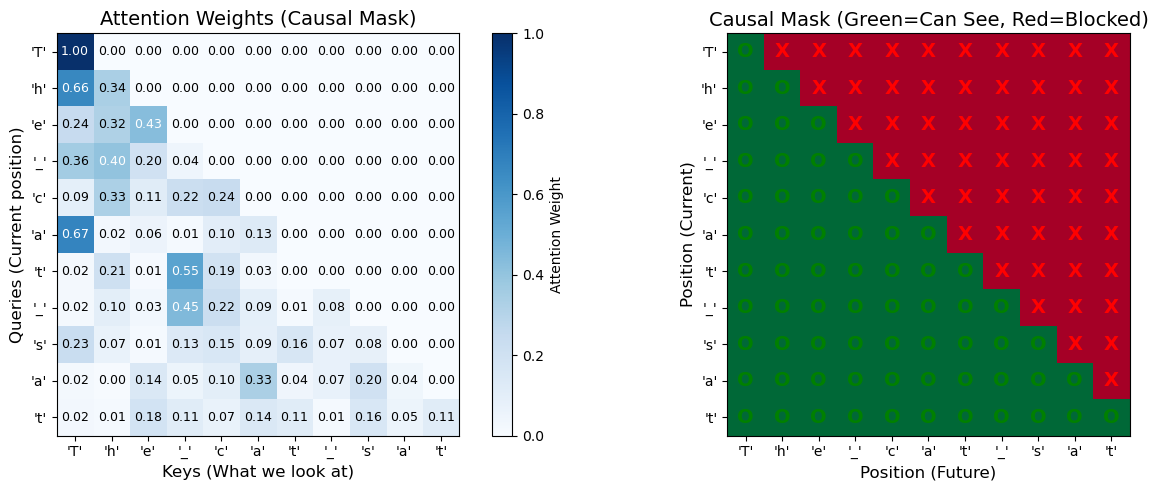


[TIP] Key Concepts:
   • Each position can only 'see' itself and previous positions
   • This prevents 'cheating' by looking at future tokens
   • Attention weights show how much each position influences another


In [36]:
# ============================================================
# STEP 3.2: Visualize How Attention Works
# ============================================================

# Let's create a simple attention visualization
sentence = "The cat sat"
tokens = list(sentence)
n_tokens = len(tokens)

# Simulate attention weights (in reality, these are learned)
# For the word "sat", what does it pay attention to?
np.random.seed(42)
attention_weights = np.random.dirichlet(np.ones(n_tokens), size=n_tokens)

# Make it more realistic: things attend more to nearby tokens
for i in range(n_tokens):
    for j in range(n_tokens):
        if j > i:  # Can't attend to future (causal mask)
            attention_weights[i, j] = 0
    # Normalize
    if attention_weights[i].sum() > 0:
        attention_weights[i] /= attention_weights[i].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Attention heatmap
ax1 = axes[0]
im = ax1.imshow(attention_weights, cmap='Blues', vmin=0, vmax=1)
ax1.set_xticks(range(n_tokens))
ax1.set_yticks(range(n_tokens))
ax1.set_xticklabels([f"'{t}'" if t != ' ' else "'_'" for t in tokens])
ax1.set_yticklabels([f"'{t}'" if t != ' ' else "'_'" for t in tokens])
ax1.set_xlabel("Keys (What we look at)", fontsize=12)
ax1.set_ylabel("Queries (Current position)", fontsize=12)
ax1.set_title("Attention Weights (Causal Mask)", fontsize=14)
plt.colorbar(im, ax=ax1, label='Attention Weight')

# Add values to heatmap
for i in range(n_tokens):
    for j in range(n_tokens):
        color = 'white' if attention_weights[i,j] > 0.4 else 'black'
        ax1.text(j, i, f'{attention_weights[i,j]:.2f}', ha='center', va='center', 
                fontsize=9, color=color)

# Causal mask explanation
ax2 = axes[1]
causal_mask = np.triu(np.ones((n_tokens, n_tokens)), k=1)
ax2.imshow(causal_mask, cmap='RdYlGn_r', vmin=0, vmax=1)
ax2.set_xticks(range(n_tokens))
ax2.set_yticks(range(n_tokens))
ax2.set_xticklabels([f"'{t}'" if t != ' ' else "'_'" for t in tokens])
ax2.set_yticklabels([f"'{t}'" if t != ' ' else "'_'" for t in tokens])
ax2.set_xlabel("Position (Future)", fontsize=12)
ax2.set_ylabel("Position (Current)", fontsize=12)
ax2.set_title("Causal Mask (Green=Can See, Red=Blocked)", fontsize=14)

# Add labels
for i in range(n_tokens):
    for j in range(n_tokens):
        text = "X" if causal_mask[i,j] else "O"
        color = 'red' if causal_mask[i,j] else 'green'
        ax2.text(j, i, text, ha='center', va='center', fontsize=14, 
                fontweight='bold', color=color)

plt.tight_layout()
plt.savefig('artifacts/attention_visual.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Key Concepts:")
print("   • Each position can only 'see' itself and previous positions")
print("   • This prevents 'cheating' by looking at future tokens")
print("   • Attention weights show how much each position influences another")

### [BRAIN] Step 3.3: Understanding Neural Memory (Long-Term Memory)

This is the **innovation of Titans**! 

Standard Transformers only have attention (short-term memory). Titans adds a **Neural Memory Module** - an MLP (Multi-Layer Perceptron) that learns to store long-term patterns.

```
               Neural Memory (MLP)
              ┌───────────────────┐
   Input ───► │ Linear -> GELU     │
              │ Linear -> GELU     │ ───► Output  
              │ (stores patterns) │
              └───────────────────┘
              
   Think of it as: A small brain that remembers
   important patterns from LONG ago!
```

[BRAIN] Neural Memory Module Created!
   • Input shape:  torch.Size([1, 10, 128])
   • Output shape: torch.Size([1, 10, 128])
   • Parameters: 131,840


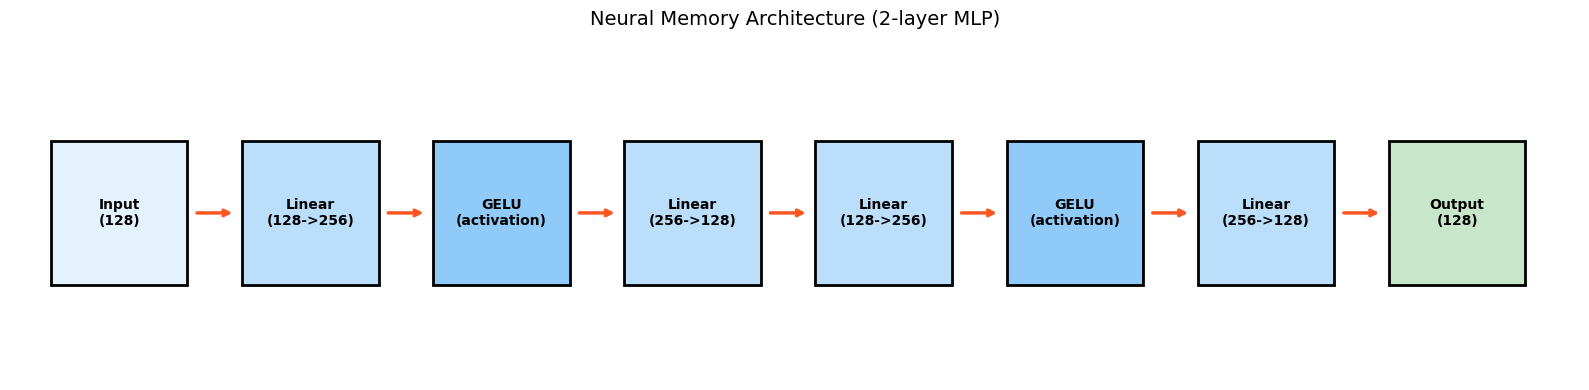


[TIP] How it works:
   1. Input goes through expansion (128 -> 256)
   2. GELU adds non-linearity (allows complex patterns)
   3. Compression back to original size (256 -> 128)
   4. Repeat for deeper memory!


In [37]:
# ============================================================
# STEP 3.3: Build the Neural Memory Module
# ============================================================

class NeuralMemory(nn.Module):
    """
    The 'Long-Term Memory' of our AI.
    
    Think of it as a small neural network that learns to store
    important patterns from the past in its weights.
    
    Architecture:
        Input (128) -> Linear (256) -> GELU -> Linear (128) -> Output
                      ↑                        ↑
                  Expansion            Back to original size
    """
    def __init__(self, dim, memory_depth=2):
        super().__init__()
        
        # Build the memory network layer by layer
        layers = []
        for i in range(memory_depth):
            # Expand dimensions (allows for richer representations)
            layers.append(nn.Linear(dim, dim * 2))
            # Non-linearity (allows learning complex patterns)
            layers.append(nn.GELU())
            # Project back to original dimension
            layers.append(nn.Linear(dim * 2, dim))
        
        self.net = nn.Sequential(*layers)
        self.dim = dim
        
    def forward(self, x):
        """Process input through the memory network"""
        return self.net(x)

# Test the Neural Memory
test_memory = NeuralMemory(n_embd)
test_input = torch.randn(1, 10, n_embd)  # (batch=1, seq_len=10, dim=128)
test_output = test_memory(test_input)

print("[BRAIN] Neural Memory Module Created!")
print(f"   • Input shape:  {test_input.shape}")
print(f"   • Output shape: {test_output.shape}")
print(f"   • Parameters: {sum(p.numel() for p in test_memory.parameters()):,}")

# Visualize the Neural Memory architecture
fig, ax = plt.subplots(figsize=(16, 4))

# Draw the network architecture - wider boxes, shorter height, more spacing
layers_info = [
    ('Input\n(128)', 0, '#E3F2FD'),
    ('Linear\n(128->256)', 1.4, '#BBDEFB'),
    ('GELU\n(activation)', 2.8, '#90CAF9'),
    ('Linear\n(256->128)', 4.2, '#BBDEFB'),
    ('Linear\n(128->256)', 5.6, '#BBDEFB'),
    ('GELU\n(activation)', 7.0, '#90CAF9'),
    ('Linear\n(256->128)', 8.4, '#BBDEFB'),
    ('Output\n(128)', 9.8, '#C8E6C9'),
]

box_width = 1.0
box_height = 0.6
y_center = 0.5

for i, (name, x, color) in enumerate(layers_info):
    # Draw box
    rect = plt.Rectangle((x, y_center - box_height/2), box_width, box_height, 
                          facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(x + box_width/2, y_center, name, ha='center', va='center', 
            fontsize=10, fontweight='bold')
    
    # Draw arrows between boxes
    if i < len(layers_info) - 1:
        arrow_start_x = x + box_width
        arrow_end_x = layers_info[i+1][1]
        ax.annotate('', xy=(arrow_end_x - 0.05, y_center), 
                   xytext=(arrow_start_x + 0.05, y_center),
                   arrowprops=dict(arrowstyle='->', color='#FF5722', lw=2.5))

ax.set_xlim(-0.3, 11.2)
ax.set_ylim(-0.2, 1.2)
ax.axis('off')
ax.set_title('Neural Memory Architecture (2-layer MLP)', fontsize=14, pad=15)

plt.tight_layout()
plt.savefig('artifacts/neural_memory.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] How it works:")
print("   1. Input goes through expansion (128 -> 256)")
print("   2. GELU adds non-linearity (allows complex patterns)")
print("   3. Compression back to original size (256 -> 128)")
print("   4. Repeat for deeper memory!")

### [GATE] Step 3.4: The Gating Mechanism

Now comes the clever part: **How do we combine short-term and long-term memory?**

Titans uses a **learned gate** that decides:
- "For this token, should I trust my short-term memory (attention) more?"
- "Or should I rely on my long-term patterns (neural memory)?"

```
Gate = sigmoid(learned_weights @ [attention_output, memory_output])

If gate ~ 1.0 -> Trust attention more
If gate ~ 0.0 -> Trust neural memory more
If gate ~ 0.5 -> Mix both equally
```

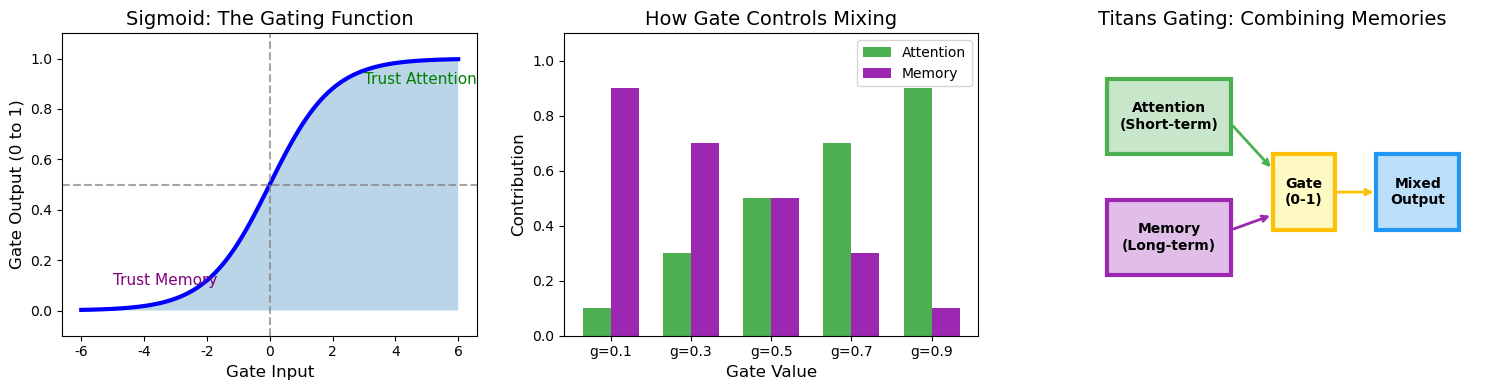


[TIP] The gate learns WHEN to use which memory!
   • Recent, simple patterns -> Use attention
   • Long-term, complex patterns -> Use neural memory


In [38]:
# ============================================================
# STEP 3.4: Visualize the Gating Mechanism
# ============================================================

# Visualize how gating works
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Sigmoid function (the gate)
ax1 = axes[0]
x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))  # Sigmoid
ax1.plot(x, y, 'b-', linewidth=3)
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
ax1.fill_between(x, y, alpha=0.3)
ax1.set_xlabel('Gate Input', fontsize=12)
ax1.set_ylabel('Gate Output (0 to 1)', fontsize=12)
ax1.set_title('Sigmoid: The Gating Function', fontsize=14)
ax1.set_ylim(-0.1, 1.1)
ax1.annotate('Trust Memory', xy=(-5, 0.1), fontsize=11, color='purple')
ax1.annotate('Trust Attention', xy=(3, 0.9), fontsize=11, color='green')

# Plot 2: Example of gating at different values
ax2 = axes[1]
gate_values = [0.1, 0.3, 0.5, 0.7, 0.9]
attn_contrib = gate_values
mem_contrib = [1 - g for g in gate_values]

x_pos = np.arange(len(gate_values))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, attn_contrib, width, label='Attention', color='#4CAF50')
bars2 = ax2.bar(x_pos + width/2, mem_contrib, width, label='Memory', color='#9C27B0')

ax2.set_xlabel('Gate Value', fontsize=12)
ax2.set_ylabel('Contribution', fontsize=12)
ax2.set_title('How Gate Controls Mixing', fontsize=14)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'g={g}' for g in gate_values])
ax2.legend()
ax2.set_ylim(0, 1.1)

# Plot 3: Visual mixing diagram
ax3 = axes[2]
ax3.axis('off')

# Draw boxes
attention_box = plt.Rectangle((0.1, 0.6), 0.3, 0.25, 
                               facecolor='#C8E6C9', edgecolor='#4CAF50', linewidth=3)
memory_box = plt.Rectangle((0.1, 0.2), 0.3, 0.25, 
                            facecolor='#E1BEE7', edgecolor='#9C27B0', linewidth=3)
gate_box = plt.Rectangle((0.5, 0.35), 0.15, 0.25, 
                          facecolor='#FFF9C4', edgecolor='#FFC107', linewidth=3)
output_box = plt.Rectangle((0.75, 0.35), 0.2, 0.25, 
                            facecolor='#BBDEFB', edgecolor='#2196F3', linewidth=3)

for box in [attention_box, memory_box, gate_box, output_box]:
    ax3.add_patch(box)

# Add text
ax3.text(0.25, 0.725, 'Attention\n(Short-term)', ha='center', va='center', fontsize=10, fontweight='bold')
ax3.text(0.25, 0.325, 'Memory\n(Long-term)', ha='center', va='center', fontsize=10, fontweight='bold')
ax3.text(0.575, 0.475, 'Gate\n(0-1)', ha='center', va='center', fontsize=10, fontweight='bold')
ax3.text(0.85, 0.475, 'Mixed\nOutput', ha='center', va='center', fontsize=10, fontweight='bold')

# Draw arrows
ax3.annotate('', xy=(0.5, 0.55), xytext=(0.4, 0.7),
            arrowprops=dict(arrowstyle='->', color='#4CAF50', lw=2))
ax3.annotate('', xy=(0.5, 0.4), xytext=(0.4, 0.35),
            arrowprops=dict(arrowstyle='->', color='#9C27B0', lw=2))
ax3.annotate('', xy=(0.75, 0.475), xytext=(0.65, 0.475),
            arrowprops=dict(arrowstyle='->', color='#FFC107', lw=2))

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_title('Titans Gating: Combining Memories', fontsize=14)

plt.tight_layout()
plt.savefig('artifacts/gating_visual.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] The gate learns WHEN to use which memory!")
print("   • Recent, simple patterns -> Use attention")
print("   • Long-term, complex patterns -> Use neural memory")

### [BUILD] Step 3.5: Building the Complete Titans Block

Now let's combine all components into a single **TitansBlock**:

1. **Attention** (short-term memory)
2. **Neural Memory** (long-term memory)  
3. **Gating** (learns when to use which)
4. **Feed-Forward Network** (additional processing)
5. **Layer Normalization** (stabilizes training)

In [39]:
# ============================================================
# STEP 3.5: Build the Titans Block
# ============================================================

class TitansBlock(nn.Module):
    """
    A single Titans layer that combines:
    - Attention (short-term memory)
    - Neural Memory (long-term memory)
    - Learned gating (decides which to trust)
    """
    def __init__(self, n_embd, n_head):
        super().__init__()
        
        # ===== SHORT-TERM: Multi-Head Attention =====
        # PyTorch's built-in attention mechanism
        self.attention = nn.MultiheadAttention(n_embd, n_head, batch_first=True)
        
        # ===== LONG-TERM: Neural Memory =====
        self.long_term_memory = NeuralMemory(n_embd)
        
        # ===== GATING: Learns when to use which memory =====
        # Takes concatenated [attention, memory] and outputs a score
        self.gate = nn.Linear(n_embd * 2, 1)
        
        # ===== FEED-FORWARD: Additional processing =====
        self.ffwd = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),  # Expand
            nn.GELU(),                       # Non-linearity
            nn.Linear(4 * n_embd, n_embd),  # Project back
            nn.Dropout(0.1),                 # Regularization
        )
        
        # ===== NORMALIZATION: Stabilizes training =====
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        """
        Process input through the Titans block.
        
        Args:
            x: Input tensor of shape (batch, sequence_length, embedding_dim)
            
        Returns:
            output: Processed tensor of same shape
            gate_mean: Average gate value (for monitoring)
        """
        B, T, C = x.shape
        
        # Step 1: Create causal mask (can't look at future tokens!)
        causal_mask = torch.triu(torch.ones(T, T), diagonal=1).bool().to(device)
        
        # Step 2: Get attention output (short-term memory)
        attn_out, _ = self.attention(x, x, x, attn_mask=causal_mask, is_causal=True)
        
        # Step 3: Get memory output (long-term memory)
        memory_out = self.long_term_memory(x)
        
        # Step 4: Compute gate (learned mixing)
        combined = torch.cat([attn_out, memory_out], dim=-1)
        gate_score = torch.sigmoid(self.gate(combined))  # Between 0 and 1
        
        # Step 5: Mix the two memory types
        # gate_score * attention + (1 - gate_score) * memory
        mixed = (gate_score * attn_out) + ((1 - gate_score) * memory_out)
        
        # Step 6: Residual connection + Layer Norm
        x = self.ln1(x + mixed)
        
        # Step 7: Feed-forward + Residual + Layer Norm
        x = self.ln2(x + self.ffwd(x))
        
        return x, gate_score.mean().item()

# Test the Titans Block
test_block = TitansBlock(n_embd, n_head=4).to(device).to(dtype)
test_input = torch.randn(2, 16, n_embd, device=device, dtype=dtype)
test_output, gate_val = test_block(test_input)

print("[BUILD] Titans Block Created!")
print(f"   • Input shape:  {test_input.shape}")
print(f"   • Output shape: {test_output.shape}")
print(f"   • Gate value:   {gate_val:.3f} (0=memory, 1=attention)")
print(f"   • Parameters:   {sum(p.numel() for p in test_block.parameters()):,}")

[BUILD] Titans Block Created!
   • Input shape:  torch.Size([2, 16, 128])
   • Output shape: torch.Size([2, 16, 128])
   • Gate value:   0.520 (0=memory, 1=attention)
   • Parameters:   330,369


### 🤖 Step 3.6: Building the Complete TitansGPT Model

Now we stack multiple Titans blocks together to create our full language model!

In [40]:
# ============================================================
# STEP 3.6: Build the Complete TitansGPT Model
# ============================================================

class TitansGPT(nn.Module):
    """
    Complete Titans Language Model.
    
    Architecture:
        Token IDs -> Embedding -> Position Embedding -> Titans Blocks -> Output
        
    The model predicts the NEXT character given the previous characters.
    """
    def __init__(self, vocab_size, n_embd=128, n_head=4, n_layer=2):
        super().__init__()
        
        # Store hyperparameters
        self.n_embd = n_embd
        self.n_layer = n_layer
        
        # ===== EMBEDDINGS =====
        # Token embedding: converts token ID to vector
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        
        # Position embedding: tells the model WHERE each token is
        self.position_embedding = nn.Embedding(1024, n_embd)  # Max 1024 tokens
        
        # ===== TITANS BLOCKS =====
        # Stack multiple Titans blocks
        self.blocks = nn.ModuleList([
            TitansBlock(n_embd, n_head) for _ in range(n_layer)
        ])
        
        # ===== OUTPUT =====
        # Final layer normalization
        self.ln_f = nn.LayerNorm(n_embd)
        
        # Language modeling head: converts embeddings to vocabulary probabilities
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None, curriculum_surprise_weight=1.0):
        """
        Forward pass through the model.
        
        Args:
            idx: Input token IDs, shape (batch, sequence_length)
            targets: Target token IDs for computing loss
            curriculum_surprise_weight: MIRAS weight for surprise-based learning
            
        Returns:
            logits: Prediction scores for each token
            loss: Training loss (if targets provided)
            gate_means: Average gate values from each block
        """
        B, T = idx.shape
        
        # Step 1: Get token embeddings
        tok_emb = self.token_embedding(idx)  # (B, T, n_embd)
        
        # Step 2: Get position embeddings
        positions = torch.arange(T, device=device)
        pos_emb = self.position_embedding(positions)  # (T, n_embd)
        
        # Step 3: Combine token + position embeddings
        x = tok_emb + pos_emb
        
        # Step 4: Pass through Titans blocks
        gate_means = []
        for block in self.blocks:
            x, gate_mean = block(x)
            gate_means.append(gate_mean)
        
        # Step 5: Final layer norm
        x = self.ln_f(x)
        
        # Step 6: Project to vocabulary
        logits = self.lm_head(x)  # (B, T, vocab_size)

        # Step 7: Compute loss (if training)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits_flat = logits.view(B * T, C)
            targets_flat = targets.view(B * T)
            
            # === MIRAS: Surprise-Weighted Learning ===
            # Compute per-token loss
            loss = F.cross_entropy(logits_flat, targets_flat, reduction='none')
            
            # Weight by surprise (harder examples get higher weight)
            loss = (loss * curriculum_surprise_weight).mean()

        return logits, loss, gate_means

# ===== CREATE THE MODEL =====
model = TitansGPT(vocab_size).to(device).to(dtype)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("🤖 TitansGPT Model Created!")
print(f"   • Vocabulary size: {vocab_size}")
print(f"   • Embedding dim:   {model.n_embd}")
print(f"   • Number of layers: {model.n_layer}")
print(f"   • Total parameters: {total_params:,} ({total_params/1e6:.2f}M)")
print(f"   • Device: {device}")

🤖 TitansGPT Model Created!
   • Vocabulary size: 65
   • Embedding dim:   128
   • Number of layers: 2
   • Total parameters: 808,771 (0.81M)
   • Device: cuda


### [CHART] Step 3.7: Visualize the Model Architecture

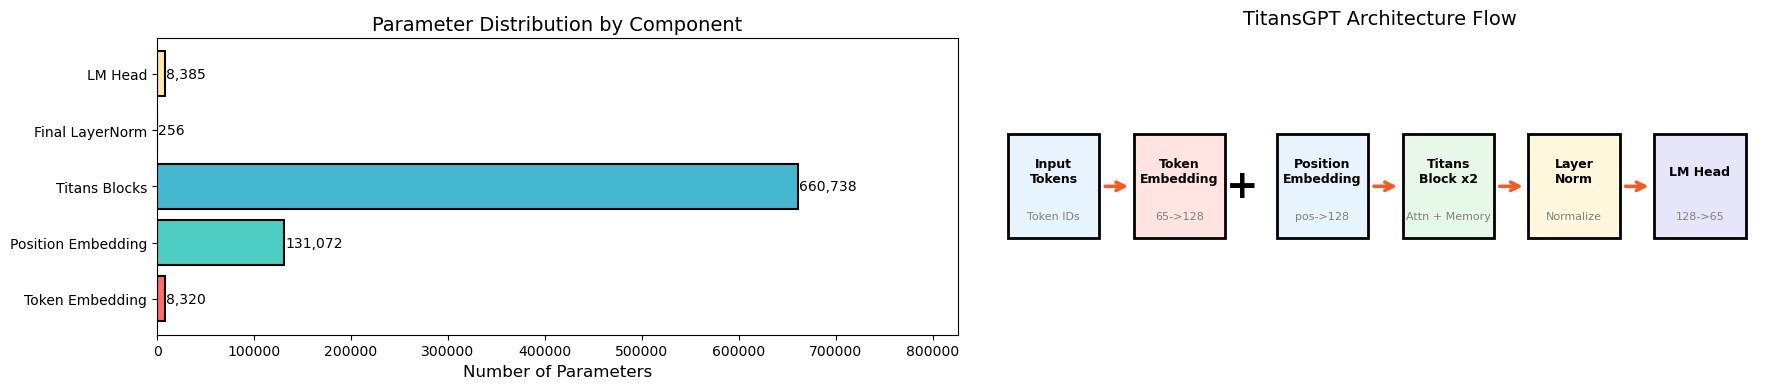


[TIP] Model Summary:
   Total: 808,771 parameters
   That's 0.81 million numbers the model learns!


In [41]:
# ============================================================
# STEP 3.7: Visualize Model Architecture & Parameter Distribution
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Plot 1: Parameter distribution by component
ax1 = axes[0]

# Count parameters by component
param_counts = {
    'Token Embedding': model.token_embedding.weight.numel(),
    'Position Embedding': model.position_embedding.weight.numel(),
    'Titans Blocks': sum(p.numel() for block in model.blocks for p in block.parameters()),
    'Final LayerNorm': sum(p.numel() for p in model.ln_f.parameters()),
    'LM Head': sum(p.numel() for p in model.lm_head.parameters()),
}

components = list(param_counts.keys())
counts = [param_counts[c] for c in components]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

bars = ax1.barh(components, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Number of Parameters', fontsize=12)
ax1.set_title('Parameter Distribution by Component', fontsize=14)

# Add count labels
for bar, count in zip(bars, counts):
    ax1.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

ax1.set_xlim(0, max(counts) * 1.25)

# Plot 2: Model Architecture Diagram
ax2 = axes[1]
ax2.axis('off')

# Draw architecture - WIDE boxes, SHORT height, LARGE spacing for arrows
# Format: (name, x_position, color, detail)
components_viz = [
    ('Input\nTokens', 0, '#E8F4FD', 'Token IDs'),
    ('Token\nEmbedding', 2.2, '#FFE4E1', f'{vocab_size}->{n_embd}'),
    ('+', 4.1, 'white', ''),
    ('Position\nEmbedding', 4.7, '#E8F4FD', f'pos->{n_embd}'),
    ('Titans\nBlock x2', 6.9, '#E8F8E8', 'Attn + Memory'),
    ('Layer\nNorm', 9.1, '#FFF8DC', 'Normalize'),
    ('LM Head', 11.3, '#E6E6FA', f'{n_embd}->{vocab_size}'),
]

y_center = 0.5
box_height = 0.35  # SHORT boxes
box_width = 1.6    # WIDE boxes

for i, (name, x, color, detail) in enumerate(components_viz):
    if name == '+':
        ax2.text(x, y_center, '+', fontsize=28, ha='center', va='center', fontweight='bold')
    else:
        rect = plt.Rectangle((x, y_center - box_height/2), 
                             box_width, box_height, 
                             facecolor=color, edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        ax2.text(x + box_width/2, y_center + 0.05, name, ha='center', va='center', 
                fontsize=9, fontweight='bold')
        ax2.text(x + box_width/2, y_center - 0.1, detail, ha='center', va='center', 
                fontsize=8, color='gray')
    
    # Draw arrows between components (skip + symbol)
    if i < len(components_viz) - 1 and name != '+' and components_viz[i+1][0] != '+':
        next_x = components_viz[i+1][1]
        arrow_start = x + box_width + 0.05
        arrow_end = next_x - 0.05
        # Draw visible arrow with sufficient length
        ax2.annotate('', xy=(arrow_end, y_center),
                    xytext=(arrow_start, y_center),
                    arrowprops=dict(arrowstyle='->', color='#FF5722', lw=2.5, 
                                   mutation_scale=15))

ax2.set_xlim(-0.5, 13.5)
ax2.set_ylim(0, 1)
ax2.set_title('TitansGPT Architecture Flow', fontsize=14, pad=10)

plt.tight_layout()
plt.savefig('artifacts/model_architecture.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Model Summary:")
print(f"   Total: {total_params:,} parameters")
print(f"   That's {total_params/1e6:.2f} million numbers the model learns!")

---

# 🎓 Part 4: Training with MIRAS

## What is Training?

Training is how neural networks **learn**. It's a loop:

```
1. FORWARD PASS:  Input -> Model -> Prediction
2. LOSS:          Compare prediction vs actual -> How wrong were we?
3. BACKWARD PASS: Calculate gradients (which direction to adjust weights)
4. UPDATE:        Adjust weights slightly in the right direction
5. REPEAT:        Do this millions of times!
```

## 🎯 What is MIRAS?

**MIRAS** (Memory-Integrated Retrieval-Augmented Surprise) is a training strategy:

> **"Focus more on SURPRISING examples"**

Think of it like studying:
- Easy problems -> Quick review, low weight
- Hard problems -> Study harder, high weight

```
Surprise = How wrong was the prediction?

High surprise -> "This is new/hard, learn it more!"
Low surprise  -> "I already know this, quick review"
```

### 📦 Step 4.1: Setting Up the Data Loader

We need a function that gives us **batches** of training data. 

Why batches?
- Processing one example at a time is slow
- Processing ALL data at once needs too much memory
- Batches are the sweet spot!

In [42]:
# ============================================================
# STEP 4.1: Training Hyperparameters & Data Loader
# ============================================================

# === HYPERPARAMETERS ===
# These are the "knobs" we can tune to affect training

batch_size = 32      # How many sequences to process at once
block_size = 128     # Length of each sequence (context window)
max_iters = 1000     # Total training steps
eval_interval = 100  # How often to evaluate
learning_rate = 3e-4 # How big each weight update is (0.0003)

print("⚙️ Training Hyperparameters:")
print(f"   • Batch size:     {batch_size} sequences per step")
print(f"   • Block size:     {block_size} tokens per sequence")
print(f"   • Max iterations: {max_iters}")
print(f"   • Learning rate:  {learning_rate}")

# === OPTIMIZER ===
# AdamW is a popular optimizer that adapts learning rate per parameter
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# === DATA LOADER FUNCTION ===
def get_batch(split):
    """
    Get a random batch of training or validation data.
    
    Args:
        split: 'train' or 'val'
        
    Returns:
        x: Input tokens (batch_size, block_size)
        y: Target tokens (batch_size, block_size) - shifted by 1!
    """
    data = train_data if split == 'train' else val_data
    
    # Pick random starting positions
    random_starts = torch.randint(len(data) - block_size, (batch_size,))
    
    # Create input (x) and target (y) sequences
    # Target is input shifted by 1 position (predict next character!)
    x = torch.stack([data[i:i + block_size] for i in random_starts])
    y = torch.stack([data[i + 1:i + block_size + 1] for i in random_starts])
    
    return x.to(device), y.to(device)

# Test the data loader
sample_x, sample_y = get_batch('train')
print(f"\n📦 Sample Batch:")
print(f"   • Input shape:  {sample_x.shape}")
print(f"   • Target shape: {sample_y.shape}")
print(f"\n   Example (first 20 tokens of first sequence):")
print(f"   Input:  '{decode(sample_x[0, :20].tolist())}'")
print(f"   Target: '{decode(sample_y[0, :20].tolist())}'")
print(f"\n   Notice: Target is shifted by 1 character!")

⚙️ Training Hyperparameters:
   • Batch size:     32 sequences per step
   • Block size:     128 tokens per sequence
   • Max iterations: 1000
   • Learning rate:  0.0003

📦 Sample Batch:
   • Input shape:  torch.Size([32, 128])
   • Target shape: torch.Size([32, 128])

   Example (first 20 tokens of first sequence):
   Input:  'all find
No public b'
   Target: 'll find
No public be'

   Notice: Target is shifted by 1 character!


### [CHART] Step 4.2: Visualize How Batching Works

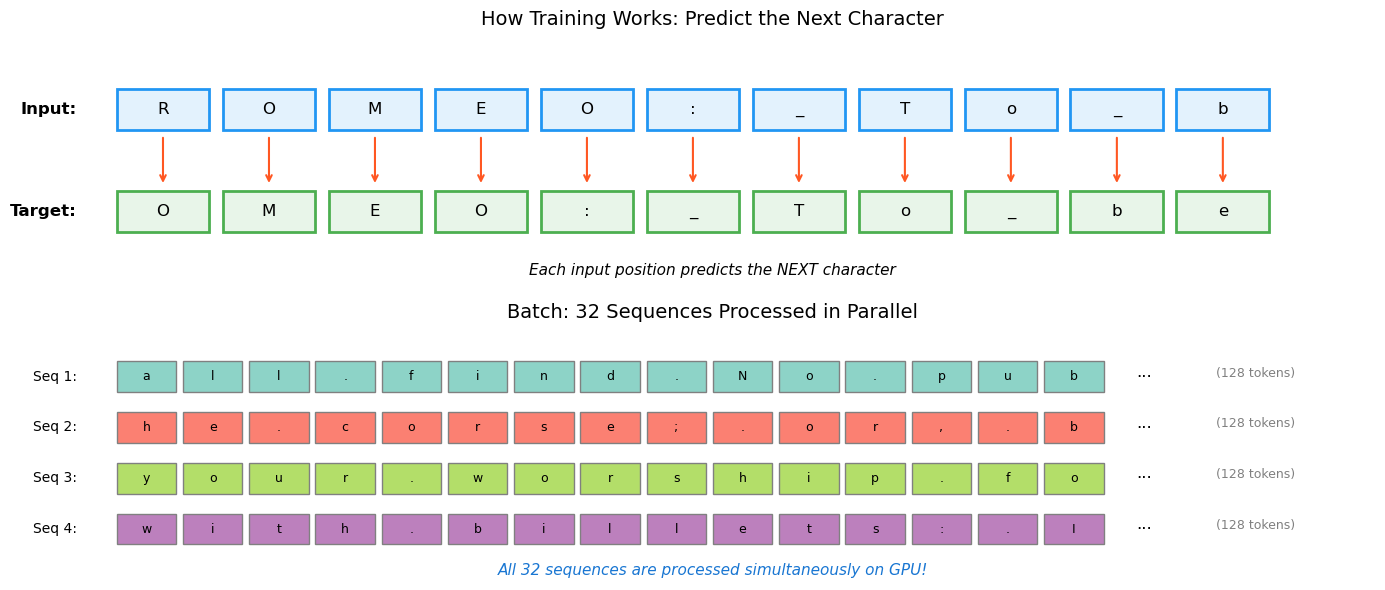


[TIP] Key Insight:
   Each training step processes 32 x 128 = 4,096 tokens!


In [43]:
# ============================================================
# STEP 4.2: Visualize Input/Target Relationship
# ============================================================

fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Show input-target relationship
example_text = "ROMEO: To be"
example_input = example_text[:-1]   # "ROMEO: To b"
example_target = example_text[1:]   # "OMEO: To be"

ax1 = axes[0]
ax1.axis('off')
ax1.set_title('How Training Works: Predict the Next Character', fontsize=14)

# Draw input sequence
y_input = 0.7
y_target = 0.3
for i, char in enumerate(example_input):
    rect = plt.Rectangle((i * 0.08 + 0.05, y_input - 0.08), 0.07, 0.16, 
                          facecolor='#E3F2FD', edgecolor='#2196F3', linewidth=2)
    ax1.add_patch(rect)
    display_char = char if char != ' ' else '_'
    ax1.text(i * 0.08 + 0.085, y_input, display_char, ha='center', va='center', fontsize=12)

# Draw target sequence
for i, char in enumerate(example_target):
    rect = plt.Rectangle((i * 0.08 + 0.05, y_target - 0.08), 0.07, 0.16, 
                          facecolor='#E8F5E9', edgecolor='#4CAF50', linewidth=2)
    ax1.add_patch(rect)
    display_char = char if char != ' ' else '_'
    ax1.text(i * 0.08 + 0.085, y_target, display_char, ha='center', va='center', fontsize=12)

# Draw arrows
for i in range(len(example_input)):
    ax1.annotate('', xy=(i * 0.08 + 0.085, y_target + 0.1), 
                xytext=(i * 0.08 + 0.085, y_input - 0.1),
                arrowprops=dict(arrowstyle='->', color='#FF5722', lw=1.5))

ax1.text(0.02, y_input, 'Input:', ha='right', va='center', fontsize=12, fontweight='bold')
ax1.text(0.02, y_target, 'Target:', ha='right', va='center', fontsize=12, fontweight='bold')
ax1.text(0.5, 0.05, 'Each input position predicts the NEXT character', 
         ha='center', fontsize=11, style='italic')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Visualize batch concept
ax2 = axes[1]
ax2.axis('off')
ax2.set_title(f'Batch: {batch_size} Sequences Processed in Parallel', fontsize=14)

# Draw batch visualization (show first 4 sequences)
for seq_idx in range(4):
    y = 0.8 - seq_idx * 0.2
    ax2.text(0.02, y, f'Seq {seq_idx+1}:', ha='right', va='center', fontsize=10)
    
    # Get a sample sequence
    seq_text = decode(sample_x[seq_idx, :15].tolist())
    for i, char in enumerate(seq_text):
        color = plt.cm.Set3(seq_idx / 4)
        rect = plt.Rectangle((i * 0.05 + 0.05, y - 0.06), 0.045, 0.12, 
                              facecolor=color, edgecolor='gray', linewidth=1)
        ax2.add_patch(rect)
        display_char = char if char not in ' \n' else '.'
        ax2.text(i * 0.05 + 0.0725, y, display_char, ha='center', va='center', fontsize=9)
    
    ax2.text(0.82, y, '...', fontsize=12)
    ax2.text(0.88, y, f'({block_size} tokens)', fontsize=9, color='gray')

ax2.text(0.5, 0.02, f'All {batch_size} sequences are processed simultaneously on GPU!', 
         ha='center', fontsize=11, style='italic', color='#1976D2')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('artifacts/batching_visual.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Key Insight:")
print(f"   Each training step processes {batch_size} x {block_size} = {batch_size * block_size:,} tokens!")

### [GRAPH] Step 4.3: The Training Loop

Now let's train our model! This is where the magic happens.

In [44]:
# ============================================================
# STEP 4.3: Evaluation Function
# ============================================================

@torch.no_grad()  # Don't compute gradients (saves memory)
def estimate_loss():
    """
    Evaluate model on both training and validation sets.
    
    Returns average loss over many batches for reliable estimates.
    """
    out = {}
    model.eval()  # Set model to evaluation mode
    
    for split in ['train', 'val']:
        losses = torch.zeros(200)  # Collect 200 samples
        for k in range(200):
            X, Y = get_batch(split)
            _, loss, _ = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean().item()
    
    model.train()  # Set model back to training mode
    return out

# Test evaluation
print("🧪 Testing evaluation function...")
initial_losses = estimate_loss()
print(f"   • Initial train loss: {initial_losses['train']:.4f}")
print(f"   • Initial val loss:   {initial_losses['val']:.4f}")
print(f"\n   (High loss is expected before training!)")

🧪 Testing evaluation function...
   • Initial train loss: 4.2878
   • Initial val loss:   4.3012

   (High loss is expected before training!)


### 🚀 Step 4.4: Run Training with MIRAS

Now we train! Watch the loss decrease over time.

In [45]:
# ============================================================
# STEP 4.4: The Main Training Loop (MIRAS-style)
# ============================================================

# Storage for training metrics
loss_history = []
val_loss_history = []
surprise_history = []  # Track gate usage
train_losses_at_eval = []
val_losses_at_eval = []
eval_iters = []

print(f"🚀 Starting Training on {device}...")
print(f"   This will take a few minutes. Watch the loss decrease!\n")

start_time = time.time()
pbar = tqdm(range(max_iters), desc="Training")

for iter in pbar:
    
    # ===== STEP 1: Get a batch of data =====
    xb, yb = get_batch('train')
    
    # ===== STEP 2: MIRAS Surprise Weighting =====
    # Every 100 steps, we "surprise" the model with higher weight
    # This simulates MIRAS's focus on surprising examples
    if iter % 100 == 0:
        surprise_weight = 2.0  # "Pay extra attention!"
    else:
        surprise_weight = 1.0  # Normal training
    
    # ===== STEP 3: Forward Pass =====
    logits, loss, gate_means = model(xb, yb, curriculum_surprise_weight=surprise_weight)
    
    # ===== STEP 4: Backward Pass =====
    optimizer.zero_grad(set_to_none=True)  # Clear old gradients
    loss.backward()                         # Compute new gradients
    optimizer.step()                        # Update weights
    
    # ===== STEP 5: Logging =====
    loss_history.append(loss.item())
    surprise_history.append(gate_means[0])  # Track layer 0 gate
    
    # ===== STEP 6: Periodic Evaluation =====
    if iter % eval_interval == 0:
        losses = estimate_loss()
        train_losses_at_eval.append(losses['train'])
        val_losses_at_eval.append(losses['val'])
        eval_iters.append(iter)
        
        # Update progress bar
        pbar.set_description(
            f"Train: {losses['train']:.4f} | Val: {losses['val']:.4f}"
        )
        
        # Save checkpoint
        checkpoint = {
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'iter': iter,
            'train_loss': losses['train'],
            'val_loss': losses['val'],
        }
        torch.save(checkpoint, f"artifacts/ckpt_{iter}.pt")

elapsed = time.time() - start_time
print(f"\n[OK] Training Complete!")
print(f"   Total time: {elapsed:.1f} seconds ({elapsed/60:.1f} minutes)")
print(f"   Final train loss: {train_losses_at_eval[-1]:.4f}")
print(f"   Final val loss:   {val_losses_at_eval[-1]:.4f}")

🚀 Starting Training on cuda...
   This will take a few minutes. Watch the loss decrease!



Train: 2.4667 | Val: 2.4741: 100%|██████████| 1000/1000 [00:22<00:00, 45.36it/s]


[OK] Training Complete!
   Total time: 22.0 seconds (0.4 minutes)
   Final train loss: 2.4667
   Final val loss:   2.4741


---

# [CHART] Part 5: Analyzing Training Results

Let's visualize what happened during training!

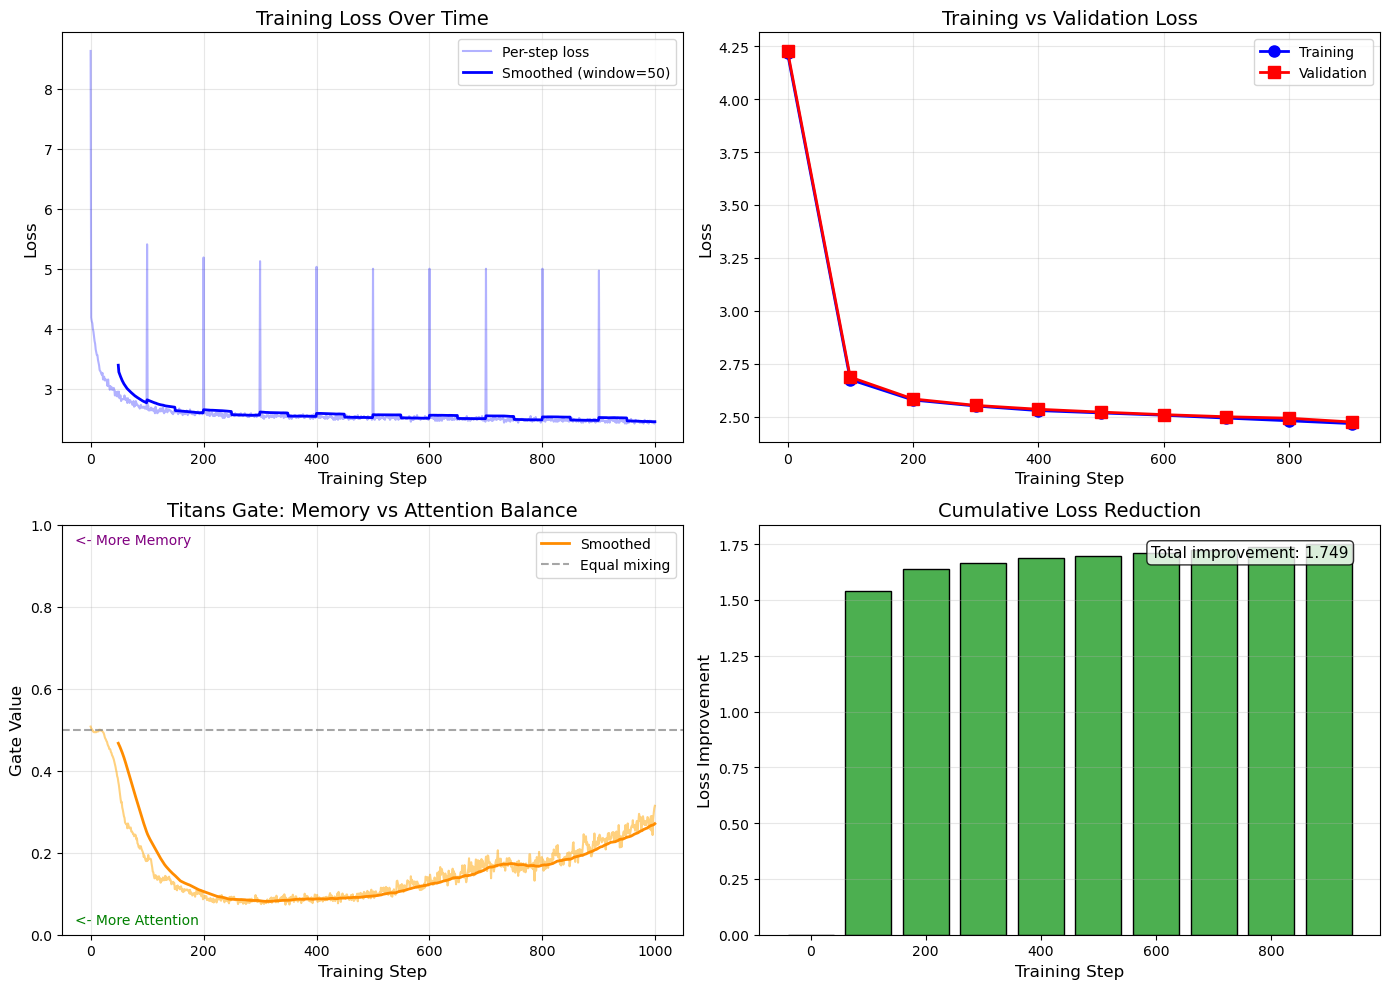


[TIP] Training Analysis:
   • Loss decreased from 4.2161 to 2.4667
   • Total improvement: 1.7494 (41.5% reduction)
   • Average gate value: 0.163


In [46]:
# ============================================================
# STEP 5.1: Comprehensive Training Visualization
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training Loss Over Time
ax1 = axes[0, 0]
ax1.plot(loss_history, alpha=0.3, color='blue', label='Per-step loss')
# Smooth the loss for better visualization
window = 50
if len(loss_history) > window:
    smoothed = np.convolve(loss_history, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(loss_history)), smoothed, color='blue', 
             linewidth=2, label=f'Smoothed (window={window})')
ax1.set_xlabel('Training Step', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss Over Time', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Train vs Validation Loss
ax2 = axes[0, 1]
ax2.plot(eval_iters, train_losses_at_eval, 'b-o', label='Training', linewidth=2, markersize=8)
ax2.plot(eval_iters, val_losses_at_eval, 'r-s', label='Validation', linewidth=2, markersize=8)
ax2.set_xlabel('Training Step', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training vs Validation Loss', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add annotations for overfitting check
if len(val_losses_at_eval) > 1:
    if val_losses_at_eval[-1] > val_losses_at_eval[-2]:
        ax2.annotate('[!] Possible overfitting', 
                    xy=(eval_iters[-1], val_losses_at_eval[-1]),
                    xytext=(eval_iters[-1]-200, val_losses_at_eval[-1]+0.2),
                    fontsize=10, color='red',
                    arrowprops=dict(arrowstyle='->', color='red'))

# Plot 3: Gate Usage Over Time
ax3 = axes[1, 0]
ax3.plot(surprise_history, color='orange', alpha=0.5)
if len(surprise_history) > window:
    smoothed_gate = np.convolve(surprise_history, np.ones(window)/window, mode='valid')
    ax3.plot(range(window-1, len(surprise_history)), smoothed_gate, 
             color='darkorange', linewidth=2, label=f'Smoothed')
ax3.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Equal mixing')
ax3.set_xlabel('Training Step', fontsize=12)
ax3.set_ylabel('Gate Value', fontsize=12)
ax3.set_title('Titans Gate: Memory vs Attention Balance', fontsize=14)
ax3.set_ylim(0, 1)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add annotations
ax3.text(0.02, 0.98, '<- More Memory', transform=ax3.transAxes, 
         fontsize=10, va='top', color='purple')
ax3.text(0.02, 0.02, '<- More Attention', transform=ax3.transAxes, 
         fontsize=10, va='bottom', color='green')

# Plot 4: Loss Improvement
ax4 = axes[1, 1]
improvements = [train_losses_at_eval[0] - l for l in train_losses_at_eval]
ax4.bar(eval_iters, improvements, color='#4CAF50', edgecolor='black', width=80)
ax4.set_xlabel('Training Step', fontsize=12)
ax4.set_ylabel('Loss Improvement', fontsize=12)
ax4.set_title('Cumulative Loss Reduction', fontsize=14)
ax4.grid(True, alpha=0.3, axis='y')

# Add total improvement annotation
total_improvement = train_losses_at_eval[0] - train_losses_at_eval[-1]
ax4.text(0.95, 0.95, f'Total improvement: {total_improvement:.3f}', 
         transform=ax4.transAxes, fontsize=11, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('artifacts/training_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Training Analysis:")
print(f"   • Loss decreased from {train_losses_at_eval[0]:.4f} to {train_losses_at_eval[-1]:.4f}")
print(f"   • Total improvement: {total_improvement:.4f} ({100*total_improvement/train_losses_at_eval[0]:.1f}% reduction)")
print(f"   • Average gate value: {np.mean(surprise_history):.3f}")

### [GRAPH] Step 5.2: Sample Generation During Training

Let's see how the model's output quality improved during training!

In [47]:
# ============================================================
# STEP 5.2: Compare Model Outputs at Different Training Stages
# ============================================================

# Define generate function (used here and in Part 6)
@torch.no_grad()
def generate(model, prompt_tokens, max_new_tokens, temperature=1.0):
    """
    Generate text from the model.
    
    Args:
        model: The trained TitansGPT model
        prompt_tokens: Starting token IDs, shape (1, seq_len)
        max_new_tokens: How many new characters to generate
        temperature: Controls randomness (lower = more predictable)
        
    Returns:
        Full sequence including prompt and generated tokens
    """
    idx = prompt_tokens
    
    for _ in range(max_new_tokens):
        # Crop to last block_size tokens (our model's context window)
        idx_cond = idx[:, -block_size:]
        
        # Get model predictions
        logits, _, _ = model(idx_cond)
        
        # Focus on the last position only
        logits = logits[:, -1, :]  # (batch, vocab_size)
        
        # Apply temperature
        logits = logits / temperature
        
        # Convert to probabilities
        probs = F.softmax(logits, dim=-1)
        
        # Sample from the distribution
        idx_next = torch.multinomial(probs, num_samples=1)
        
        # Append to sequence
        idx = torch.cat((idx, idx_next), dim=1)
    
    return idx

# Load checkpoints and compare outputs
print("[CHART] Model Evolution: Comparing outputs at different training stages\n")
print("="*70)

checkpoints_to_compare = [0, 500, 900]  # Beginning, middle, end
prompt = "ROMEO:"
prompt_tokens = torch.tensor([encode(prompt)], dtype=torch.long, device=device)

for ckpt_iter in checkpoints_to_compare:
    ckpt_path = f"artifacts/ckpt_{ckpt_iter}.pt"
    
    if os.path.exists(ckpt_path):
        # Load checkpoint
        checkpoint = torch.load(ckpt_path, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['model'])
        model.eval()
        
        # Generate sample
        generated = generate(model, prompt_tokens.clone(), max_new_tokens=100, temperature=0.8)
        output_text = decode(generated[0].tolist())
        
        train_loss = checkpoint.get('train_loss', None)
        loss_str = f"{train_loss:.4f}" if isinstance(train_loss, (int, float)) else "N/A"
        print(f"\n📍 Step {ckpt_iter} (Loss: {loss_str}):")
        print(f"   {output_text}")
        print("-"*70)
    else:
        print(f"\n[!] Checkpoint {ckpt_path} not found")

# Reload the final checkpoint
final_ckpt = f"artifacts/ckpt_{max(eval_iters)}.pt"
if os.path.exists(final_ckpt):
    checkpoint = torch.load(final_ckpt, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model'])
    model.train()
    
print("\n[OK] Final model restored!")
print("\n[TIP] Notice how the text becomes more coherent as training progresses!")

[CHART] Model Evolution: Comparing outputs at different training stages


📍 Step 0 (Loss: 4.2161):
   ROMEO:Zw.ZXHGoBFY3'WH NRn
$Wiahsh$GBlAooie  iBGpFUeR$OXjAa
FsmFXuCc'adGlOID;&'N?vOZP?EdGnLHFBfysUCU.B.nL&o
----------------------------------------------------------------------

📍 Step 500 (Loss: 2.5171):
   ROMEO:
Pus
CENOngit ICGo my pke n y oy t I u youlonsheatomu an ware hereintherg ist'd pid me ind withe go 
----------------------------------------------------------------------

📍 Step 900 (Loss: 2.4667):
   ROMEO:
ARHe lliy fang loth, thin yowanenemF be an cos ing ca he wer, ts s itinde I nFrstel susouurberindes
----------------------------------------------------------------------

[OK] Final model restored!

[TIP] Notice how the text becomes more coherent as training progresses!


### [BRAIN] Step 5.3: Understanding What the Model Learned

Let's peek inside the model to see what it learned!

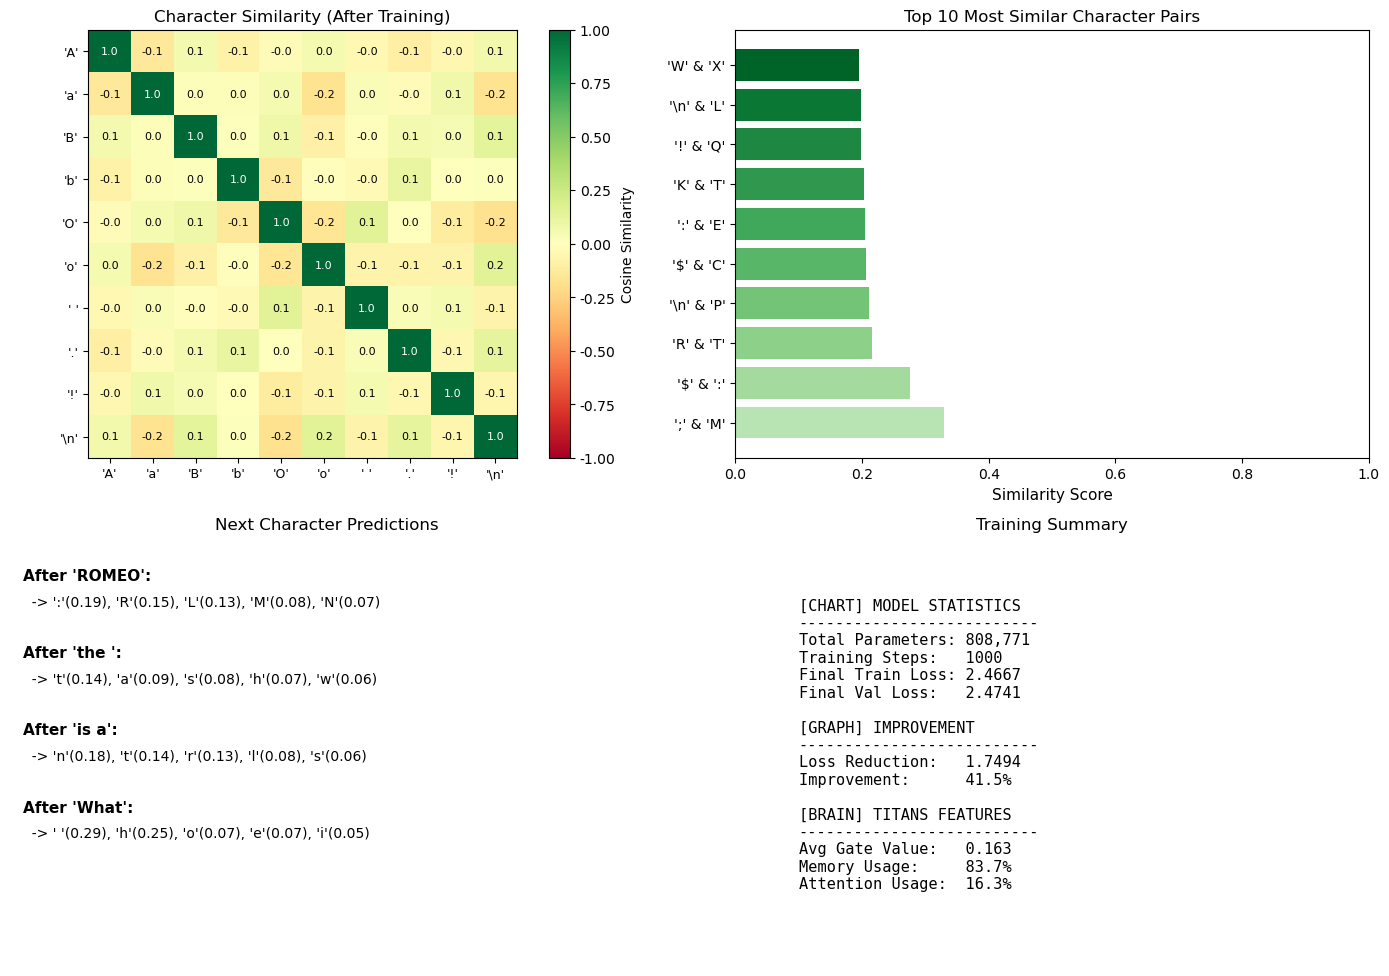


[TIP] Key Insights:
   • The model learned character similarities (A~a, upper/lowercase)
   • It can predict likely next characters based on context
   • The Titans gate learns to balance memory types!


In [48]:
# ============================================================
# STEP 5.3: Analyze What the Model Learned
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Token Embedding Similarity (after training)
ax1 = axes[0, 0]
sample_chars = ['A', 'a', 'B', 'b', 'O', 'o', ' ', '.', '!', '\n']
sample_ids = [stoi[c] for c in sample_chars if c in stoi]
sample_labels = [repr(c) if c in ' \n' else f"'{c}'" for c in sample_chars if c in stoi]

with torch.no_grad():
    embeddings = model.token_embedding.weight[sample_ids].float().cpu()
    emb_norm = F.normalize(embeddings, dim=1)
    similarity = (emb_norm @ emb_norm.T).numpy()

im = ax1.imshow(similarity, cmap='RdYlGn', vmin=-1, vmax=1)
ax1.set_xticks(range(len(sample_labels)))
ax1.set_yticks(range(len(sample_labels)))
ax1.set_xticklabels(sample_labels, fontsize=9)
ax1.set_yticklabels(sample_labels, fontsize=9)
ax1.set_title('Character Similarity (After Training)', fontsize=12)
plt.colorbar(im, ax=ax1, label='Cosine Similarity')

# Add values
for i in range(len(sample_labels)):
    for j in range(len(sample_labels)):
        color = 'white' if abs(similarity[i,j]) > 0.5 else 'black'
        ax1.text(j, i, f'{similarity[i,j]:.1f}', ha='center', va='center', fontsize=8, color=color)

# Plot 2: Most similar character pairs
ax2 = axes[0, 1]
# Find most similar pairs (excluding self-similarity)
all_chars = list(stoi.keys())[:40]  # First 40 characters
all_ids = [stoi[c] for c in all_chars]

with torch.no_grad():
    all_emb = model.token_embedding.weight[all_ids].float().cpu()
    all_norm = F.normalize(all_emb, dim=1)
    all_sim = (all_norm @ all_norm.T).numpy()

# Get top similar pairs
pairs = []
for i in range(len(all_chars)):
    for j in range(i+1, len(all_chars)):
        pairs.append((all_sim[i,j], all_chars[i], all_chars[j]))

pairs.sort(reverse=True)
top_pairs = pairs[:10]

pair_labels = [f"'{p[1]}' & '{p[2]}'" if p[1] not in '\n\t ' and p[2] not in '\n\t ' 
               else f"{repr(p[1])} & {repr(p[2])}" for p in top_pairs]
pair_sims = [p[0] for p in top_pairs]

colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(pair_labels)))
ax2.barh(range(len(pair_labels)), pair_sims, color=colors)
ax2.set_yticks(range(len(pair_labels)))
ax2.set_yticklabels(pair_labels, fontsize=10)
ax2.set_xlabel('Similarity Score', fontsize=11)
ax2.set_title('Top 10 Most Similar Character Pairs', fontsize=12)
ax2.set_xlim(0, 1)

# Plot 3: Next character prediction heatmap
ax3 = axes[1, 0]
test_contexts = ['ROMEO', 'the ', 'is a', 'What']
next_char_probs = []

model.eval()
with torch.no_grad():
    for ctx in test_contexts:
        tokens = torch.tensor([encode(ctx)], dtype=torch.long, device=device)
        logits, _, _ = model(tokens)
        probs = F.softmax(logits[0, -1, :].float(), dim=0).cpu().numpy()
        # Get top 5 predictions
        top_indices = probs.argsort()[-5:][::-1]
        top_probs = probs[top_indices]
        top_chars = [itos[i] for i in top_indices]
        next_char_probs.append((ctx, list(zip(top_chars, top_probs))))

# Display predictions
ax3.axis('off')
ax3.set_title('Next Character Predictions', fontsize=12)
y_start = 0.9
for ctx, predictions in next_char_probs:
    pred_str = ', '.join([f"'{c}'({p:.2f})" if c not in '\n\t ' else f"{repr(c)}({p:.2f})" 
                          for c, p in predictions])
    ax3.text(0.02, y_start, f"After '{ctx}':", fontsize=11, fontweight='bold', 
             transform=ax3.transAxes)
    ax3.text(0.02, y_start - 0.06, f"  -> {pred_str}", fontsize=10, 
             transform=ax3.transAxes)
    y_start -= 0.18

# Plot 4: Summary stats
ax4 = axes[1, 1]
ax4.axis('off')
ax4.set_title('Training Summary', fontsize=12)

summary_text = f"""
[CHART] MODEL STATISTICS
--------------------------
Total Parameters: {sum(p.numel() for p in model.parameters()):,}
Training Steps:   {max_iters}
Final Train Loss: {train_losses_at_eval[-1]:.4f}
Final Val Loss:   {val_losses_at_eval[-1]:.4f}

[GRAPH] IMPROVEMENT
--------------------------
Loss Reduction:   {train_losses_at_eval[0] - train_losses_at_eval[-1]:.4f}
Improvement:      {100*(train_losses_at_eval[0] - train_losses_at_eval[-1])/train_losses_at_eval[0]:.1f}%

[BRAIN] TITANS FEATURES
--------------------------
Avg Gate Value:   {np.mean(surprise_history):.3f}
Memory Usage:     {100*(1-np.mean(surprise_history)):.1f}%
Attention Usage:  {100*np.mean(surprise_history):.1f}%
"""

ax4.text(0.1, 0.9, summary_text, fontsize=11, family='monospace',
         verticalalignment='top', transform=ax4.transAxes)

plt.tight_layout()
plt.savefig('artifacts/learning_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[TIP] Key Insights:")
print("   • The model learned character similarities (A~a, upper/lowercase)")
print("   • It can predict likely next characters based on context")
print("   • The Titans gate learns to balance memory types!")

---

# [CHAT] Part 6: Text Generation & Inference

Now for the fun part - let's see our model generate text!

## How Does Generation Work?

```
1. Give model a "prompt" (starting text)
2. Model predicts probabilities for next character
3. Sample from probabilities (pick a character)
4. Add new character to prompt
5. Repeat steps 2-4!
```

This is called **autoregressive generation** - the model uses its own outputs as inputs!

### 🎲 Step 6.1: The Generation Function

In [49]:
# ============================================================
# STEP 6.1: Text Generation Function
# ============================================================

@torch.no_grad()
def generate(model, prompt_tokens, max_new_tokens, temperature=1.0):
    """
    Generate text from the model.
    
    Args:
        model: The trained TitansGPT model
        prompt_tokens: Starting token IDs, shape (1, seq_len)
        max_new_tokens: How many new characters to generate
        temperature: Controls randomness (lower = more predictable)
        
    Returns:
        Full sequence including prompt and generated tokens
    """
    idx = prompt_tokens
    
    for _ in range(max_new_tokens):
        # Crop to last block_size tokens (our model's context window)
        idx_cond = idx[:, -block_size:]
        
        # Get model predictions
        logits, _, _ = model(idx_cond)
        
        # Focus on the last position only
        logits = logits[:, -1, :]  # (batch, vocab_size)
        
        # Apply temperature
        # Higher temperature = more random, lower = more focused
        logits = logits / temperature
        
        # Convert to probabilities
        probs = F.softmax(logits, dim=-1)
        
        # Sample from the distribution
        idx_next = torch.multinomial(probs, num_samples=1)
        
        # Append to sequence
        idx = torch.cat((idx, idx_next), dim=1)
    
    return idx

# Test generation with different prompts
print("🎭 Text Generation Examples:\n")

test_prompts = [
    "ROMEO:",
    "To be or not",
    "The king",
]

for prompt in test_prompts:
    print(f"Prompt: '{prompt}'")
    prompt_tokens = torch.tensor([encode(prompt)], dtype=torch.long, device=device)
    
    generated = generate(model, prompt_tokens, max_new_tokens=100, temperature=0.8)
    generated_text = decode(generated[0].tolist())
    
    print(f"Generated: {generated_text}")
    print("-" * 60)

🎭 Text Generation Examples:

Prompt: 'ROMEO:'
Generated: ROMEO:
An I
The, s t ador, cief ttouno atheshe ouse o es n n,
I I t wat thishayoul n, st s, hapandetheas t
------------------------------------------------------------
Prompt: 'To be or not'
Generated: To be or nothin toowstar!
That perseerinis tl leru her.
ARok mer NTHe wng RTounofothar Gall ththof t, at grin co
------------------------------------------------------------
Prompt: 'The king'
Generated: The kinge he'loure doouno ot the drey wougencon,
G de wly I ck hathiemerd oojir g se f n ice has coulno,, me
------------------------------------------------------------


### [TEMP] Step 6.2: Understanding Temperature

**Temperature** controls how "creative" the model is:
- `temperature = 0.1`: Very predictable, always picks top choice
- `temperature = 1.0`: Balanced, follows probability distribution
- `temperature = 2.0`: Very random, might pick unlikely tokens

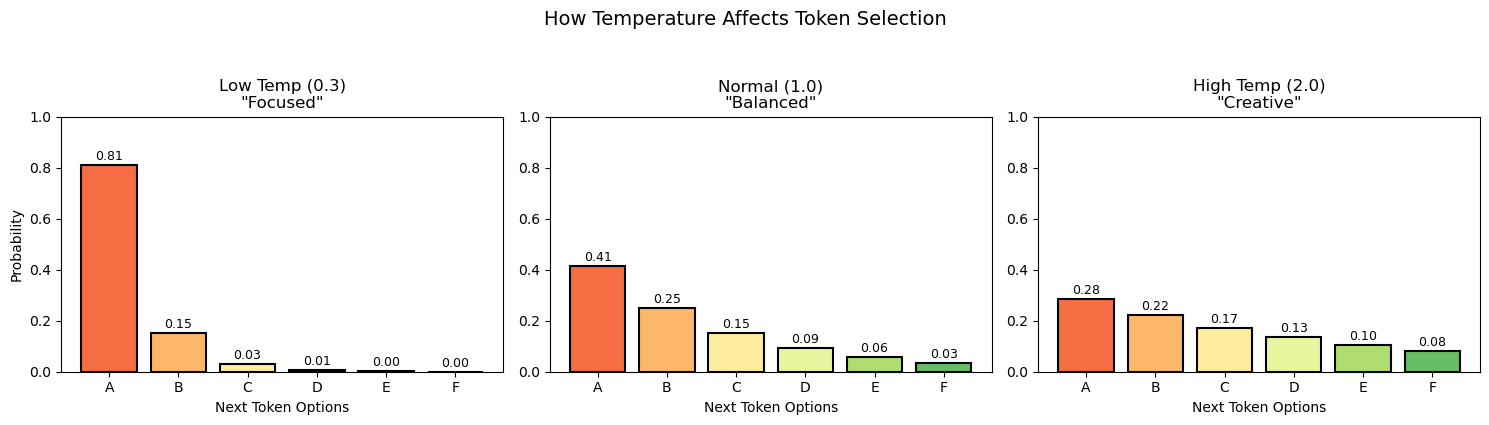


[TEMP] Same Prompt, Different Temperatures:

Temperature = 0.3:
  ROMEO:
The w ther ghe w theat the the ain t and the thand s the t thand he cound the t

Temperature = 0.8:
  ROMEO:
Thiwitispast banu e 't wingin t homenon w
I s d be t s oe, fe an lloweaig antor

Temperature = 1.5:
  ROMEO:ove;
Arithnooireaca tren wayjoro?

ssus w. sou idaste to? gee shetikdwiby s: sop



In [50]:
# ============================================================
# STEP 6.2: Visualize Temperature Effect
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Show how temperature affects probability distribution
example_logits = torch.tensor([2.0, 1.5, 1.0, 0.5, 0.0, -0.5])  # Raw model output
labels = ['A', 'B', 'C', 'D', 'E', 'F']

temperatures = [0.3, 1.0, 2.0]
titles = ['Low Temp (0.3)\n"Focused"', 'Normal (1.0)\n"Balanced"', 'High Temp (2.0)\n"Creative"']

for ax, temp, title in zip(axes, temperatures, titles):
    scaled_logits = example_logits / temp
    probs = F.softmax(scaled_logits, dim=0).numpy()
    
    colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(probs)))
    bars = ax.bar(labels, probs, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Probability' if ax == axes[0] else '')
    ax.set_xlabel('Next Token Options')
    ax.set_title(title, fontsize=12)
    ax.set_ylim(0, 1)
    
    # Add probability labels
    for bar, prob in zip(bars, probs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
               f'{prob:.2f}', ha='center', fontsize=9)

plt.suptitle('How Temperature Affects Token Selection', fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig('artifacts/temperature_visual.png', dpi=150, bbox_inches='tight')
plt.show()

# Generate with different temperatures
print("\n[TEMP] Same Prompt, Different Temperatures:\n")
prompt = "ROMEO:"
prompt_tokens = torch.tensor([encode(prompt)], dtype=torch.long, device=device)

for temp in [0.3, 0.8, 1.5]:
    generated = generate(model, prompt_tokens, max_new_tokens=80, temperature=temp)
    print(f"Temperature = {temp}:")
    print(f"  {decode(generated[0].tolist())}")
    print()

### [CHAT] Step 6.3: Multi-Turn Conversation Demo

Let's simulate a conversation where the model maintains context across multiple turns. This demonstrates how the Titans architecture can remember and build upon previous context.

In [51]:
# ============================================================
# STEP 6.3: Multi-Turn Conversation Demo
# ============================================================

def demonstrate_conversation(prompts, tokens_per_turn=100):
    """
    Demonstrate multi-turn conversation with the model.
    The model maintains context across turns.
    
    Args:
        prompts: List of prompts to send to the model
        tokens_per_turn: How many tokens to generate per turn
    """
    print("\n" + "="*70)
    print("[CHAT] MULTI-TURN CONVERSATION DEMO")
    print("="*70)
    print("Watching how the model maintains context across turns...\n")
    
    # Initialize context
    context = torch.tensor([[stoi.get('\n', 0)]], dtype=torch.long, device=device)
    
    for i, prompt in enumerate(prompts, 1):
        print(f"[NOTE] Turn {i} - Input: \"{prompt}\"")
        print("-" * 50)
        
        # Encode and add prompt to context
        prompt_tokens = torch.tensor([encode(prompt)], dtype=torch.long, device=device)
        context = torch.cat((context, prompt_tokens), dim=1)
        
        # Generate response
        response = generate(model, context, max_new_tokens=tokens_per_turn, temperature=0.8)
        
        # Get only new tokens
        new_tokens = response[0, context.shape[1]:].tolist()
        response_text = decode(new_tokens)
        
        print(f"🤖 Titans: {response_text}")
        print(f"\n   [Context length: {response.shape[1]} tokens]")
        print("=" * 70 + "\n")
        
        # Update context for next turn
        context = response
    
    return context

# Demo 1: Shakespeare-style dialogue
print("🎭 DEMO 1: Shakespeare Dialogue Continuation")
shakespeare_prompts = [
    "ROMEO:",
    "JULIET:",
    "ROMEO: But soft,",
]
_ = demonstrate_conversation(shakespeare_prompts)

# Demo 2: Building a scene
print("\n" + "🏰 DEMO 2: Scene Building")
scene_prompts = [
    "Enter KING and QUEEN.",
    "KING: My lord,",
    "QUEEN: What news",
]
_ = demonstrate_conversation(scene_prompts)

# Demo 3: Completing famous lines
print("\n" + "📜 DEMO 3: Famous Line Completions")
famous_prompts = [
    "To be or not to be",
    "All the world's a stage",
    "What light through yonder",
]

model.eval()
print("="*70)
print("📜 COMPLETING FAMOUS SHAKESPEARE LINES")
print("="*70 + "\n")

for prompt in famous_prompts:
    prompt_tokens = torch.tensor([encode(prompt)], dtype=torch.long, device=device)
    generated = generate(model, prompt_tokens, max_new_tokens=80, temperature=0.7)
    output = decode(generated[0].tolist())
    
    print(f"Prompt: \"{prompt}\"")
    print(f"Completion: {output}")
    print("-" * 50)

print("\n[OK] Conversation demos complete!")
print("\n[TIP] Notice how the model:")
print("   • Follows Shakespeare's writing style")
print("   • Maintains character dialogue format")  
print("   • Builds coherent (though not always perfect) text")

🎭 DEMO 1: Shakespeare Dialogue Continuation

[CHAT] MULTI-TURN CONVERSATION DEMO
Watching how the model maintains context across turns...

[NOTE] Turn 1 - Input: "ROMEO:"
--------------------------------------------------
🤖 Titans: 
Am, vat se aloisothes he f nt ge awo.


Fcha he y m htwn s st, ther ith d el it hathas.
Otharan an 

   [Context length: 107 tokens]

[NOTE] Turn 2 - Input: "JULIET:"
--------------------------------------------------
🤖 Titans: 
Ahthard a r wTEROl the tan chanfenou su no ayoul my s my;
The has,'ncel athamKENAerrer ahise ppe to

   [Context length: 214 tokens]

[NOTE] Turn 3 - Input: "ROMEO: But soft,"
--------------------------------------------------
🤖 Titans: 
Touvinthindpthinou igheate t o-bfisplthe manensore, t it, p l nothar ble f nkey t.


Thertherg angh

   [Context length: 330 tokens]


🏰 DEMO 2: Scene Building

[CHAT] MULTI-TURN CONVERSATION DEMO
Watching how the model maintains context across turns...

[NOTE] Turn 1 - Input: "Enter KING and QUEEN.

---

# 🎉 Congratulations!

You've successfully built a **Titans + MIRAS** language model from scratch! 

## [NOTE] What You Learned

| Topic | What You Learned |
|-------|------------------|
| **Data Pipeline** | How to tokenize text and create training batches |
| **Embeddings** | Converting tokens to learnable vectors |
| **Attention** | Short-term memory that focuses on recent context |
| **Neural Memory** | Long-term memory that stores patterns in weights |
| **Gating** | Learning when to trust which memory type |
| **Training Loop** | Forward pass -> Loss -> Backward pass -> Update |
| **MIRAS** | Focusing on surprising examples during training |
| **Generation** | Autoregressive text generation with temperature |

## 🚀 Next Steps

1. **Experiment with hyperparameters**: Try different `n_embd`, `n_layer`, `learning_rate`
2. **Train longer**: Increase `max_iters` for better results
3. **Try different data**: Use your own text corpus
4. **Scale up**: Use a larger model with more layers
5. **Read the paper**: Understand the full Titans architecture

## [INFO] References

* **Original Paper:** [Titans: Learning to Memorize at Test Time](https://arxiv.org/abs/2501.00663)
* **Google Research Blog:** [Titans + MIRAS: Helping AI have long-term memory](https://research.google/blog/titans-miras-helping-ai-have-long-term-memory/)
* **Video Explanation:** [YouTube - Titans Explained](https://www.youtube.com/watch?v=_WFgtK6K01g)
* **Andrej Karpathy's nanoGPT:** [GitHub](https://github.com/karpathy/nanoGPT) - Inspiration for this tutorial

---

*This is an educational implementation inspired by the Titans paper. It is not the official Google implementation.*

**Created with ❤️ for AI/ML beginners**